# 📊 **Discretizing Continuous Data for the Dynamic Bayesian Networks**

**Import useful libraries**

In [ ]:
import os
import glob
import numpy as np
import pandas as pd

import logging
logging.getLogger().setLevel(logging.CRITICAL)
logging.getLogger("matplotlib").setLevel(logging.WARNING)

import warnings
warnings.filterwarnings('ignore')

from utilities import DataVisualizer, DataDiscretizer, DataProcessor, DataEncoder

**Define basic folder paths**

In [2]:
# Define folder names
DATA_FOLDER_NAME = r".\data"


ORIGINAL_DATASETS_IMOLA_FOLDER_NAME   = os.path.join(DATA_FOLDER_NAME, "datasets-imola")
DISCRETIZED_ORIGINAL_DATASETS_IMOLA_FOLDER_NAME   = os.path.join(DATA_FOLDER_NAME, "discretized-datasets-imola")

AGGREGATED_DATASETS_IMOLA_FOLDER_NAME = os.path.join(DATA_FOLDER_NAME, "aggregated-datasets-imola")
DISCRETIZED_AGGREGATED_DATASETS_IMOLA_FOLDER_NAME = os.path.join(DATA_FOLDER_NAME, "discretized-aggregated-datasets-imola")

## 🔔 Analyzing data distributions

In [3]:
# Get all CSV dataset files from the specified folder
datasets_imola = glob.glob(os.path.join(ORIGINAL_DATASETS_IMOLA_FOLDER_NAME, "*.csv"))

print(f"📂 Found {len(datasets_imola)} datasets in '{ORIGINAL_DATASETS_IMOLA_FOLDER_NAME}'")

📂 Found 3 datasets in '.\data\datasets-imola'


### 🔷 Analyzing `20241128-imola` dataset

📂 Loading dataset: .\data\datasets-imola\20241128-imola.csv

🔍 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248448 entries, 0 to 248447
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   BatteryVoltage_V             248448 non-null  float64
 1   BatteryCurrent_A             248448 non-null  float64
 2   BatteryPackTemp_C            248448 non-null  float64
 3   InverterFault                248448 non-null  int64  
 4   InverterSpeed_RearLeft_RPM   248448 non-null  float64
 5   Inverter_Iq_Ref_RearLeft_A   248448 non-null  float64
 6   Inverter_Id_Ref_RearLeft_A   248448 non-null  float64
 7   MotorTemp_RearLeft_C         248448 non-null  float64
 8   InverterTemp_RearLeft_C      248448 non-null  float64
 9   InverterSpeed_RearRight_RPM  248448 non-null  float64
 10  Inverter_Iq_Ref_RearRight_A  248448 non-null  float64
 11  Inverter_Id_Ref_RearRight_A  248448 

BatteryVoltage_V  BatteryCurrent_A  BatteryPackTemp_C  InverterFault  \
0         504.26001              0.00               13.9              0   
1         504.26001              0.00               13.9              0   
2         504.26001              0.00               13.9              0   
3         504.26001             -0.03               13.9              0   
4         504.26001             -0.03               13.9              0   

   InverterSpeed_RearLeft_RPM  Inverter_Iq_Ref_RearLeft_A  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   Inverter_Id_Ref_RearLeft_A  MotorTemp_RearLeft_C  InverterTemp_RearLeft_C  \
0                         0.0                  13.0                     15.0   
1                         0.0                  13.0                     15.0   
2                         0.0                  13.0                     15.0   
3                         0.0                  13.0                     15.0   
4                         0.0                  13.0                     15.0   

   InverterSpeed_RearRight_RPM  Inverter_Iq_Ref_RearRight_A  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Inverter_Id_Ref_RearRight_A  MotorTemp_RearRight_C  \
0                          0.0                   14.0   
1                          0.0                   14.0   
2                          0.0                   14.0   
3                          0.0                   14.0   
4                          0.0                   14.0   

   InverterTemp_RearRight_C  
0                      15.0  
1                      15.0  
2                      15.0  
3                      15.0  
4                      15.0


📈 Summary Statistics:


BatteryVoltage_V  BatteryCurrent_A  BatteryPackTemp_C  InverterFault  \
count     248448.000000     248448.000000      248448.000000       248448.0   
mean         470.132810          9.072812          22.137357            0.0   
std           18.943940         19.741638           5.606731            0.0   
min          413.500000        -36.689999          13.750000            0.0   
25%          453.799988          0.060000          16.750000            0.0   
50%          468.540009          0.090000          21.959999            0.0   
75%          485.420013         10.660000          27.820000            0.0   
max          510.779999        115.239998          29.680000            0.0   

       InverterSpeed_RearLeft_RPM  Inverter_Iq_Ref_RearLeft_A  \
count               248448.000000               248448.000000   
mean                  2691.249139                    6.832681   
std                   3324.347981                   12.631832   
min                    -76.000000                  -26.750000   
25%                      0.000000                    0.000000   
50%                      3.000000                    0.000000   
75%                   6012.000000                   11.562500   
max                  14881.000000                   52.000000   

       Inverter_Id_Ref_RearLeft_A  MotorTemp_RearLeft_C  \
count               248448.000000         248448.000000   
mean                    -1.531501             40.275965   
std                      3.431754             14.733796   
min                    -49.812500             12.000000   
25%                     -2.062500             32.000000   
50%                      0.000000             39.000000   
75%                      0.000000             49.000000   
max                      0.000000             76.000000   

       InverterTemp_RearLeft_C  InverterSpeed_RearRight_RPM  \
count            248448.000000                248448.000000   
mean                 29.517537                  2656.734955   
std                   5.621444                  3253.950091   
min                  15.000000                   -11.000000   
25%                  27.000000                     0.000000   
50%                  30.000000                     0.000000   
75%                  33.000000                  5861.000000   
max                  45.000000                 12655.000000   

       Inverter_Iq_Ref_RearRight_A  Inverter_Id_Ref_RearRight_A  \
count                248448.000000                248448.000000   
mean                     -6.073359                    -1.456921   
std                      11.886625                     3.229787   
min                     -50.500000                   -45.375000   
25%                     -10.812500                    -2.000000   
50%                       0.000000                     0.000000   
75%                       0.000000                     0.000000   
max                      32.875000                     0.000000   

       MotorTemp_RearRight_C  InverterTemp_RearRight_C  
count          248448.000000             248448.000000  
mean               43.435157                 29.595223  
std                16.021885                  5.499356  
min                13.000000                 15.000000  
25%                34.000000                 27.000000  
50%                42.000000                 30.000000  
75%                54.000000                 33.000000  
max                80.000000                 44.000000

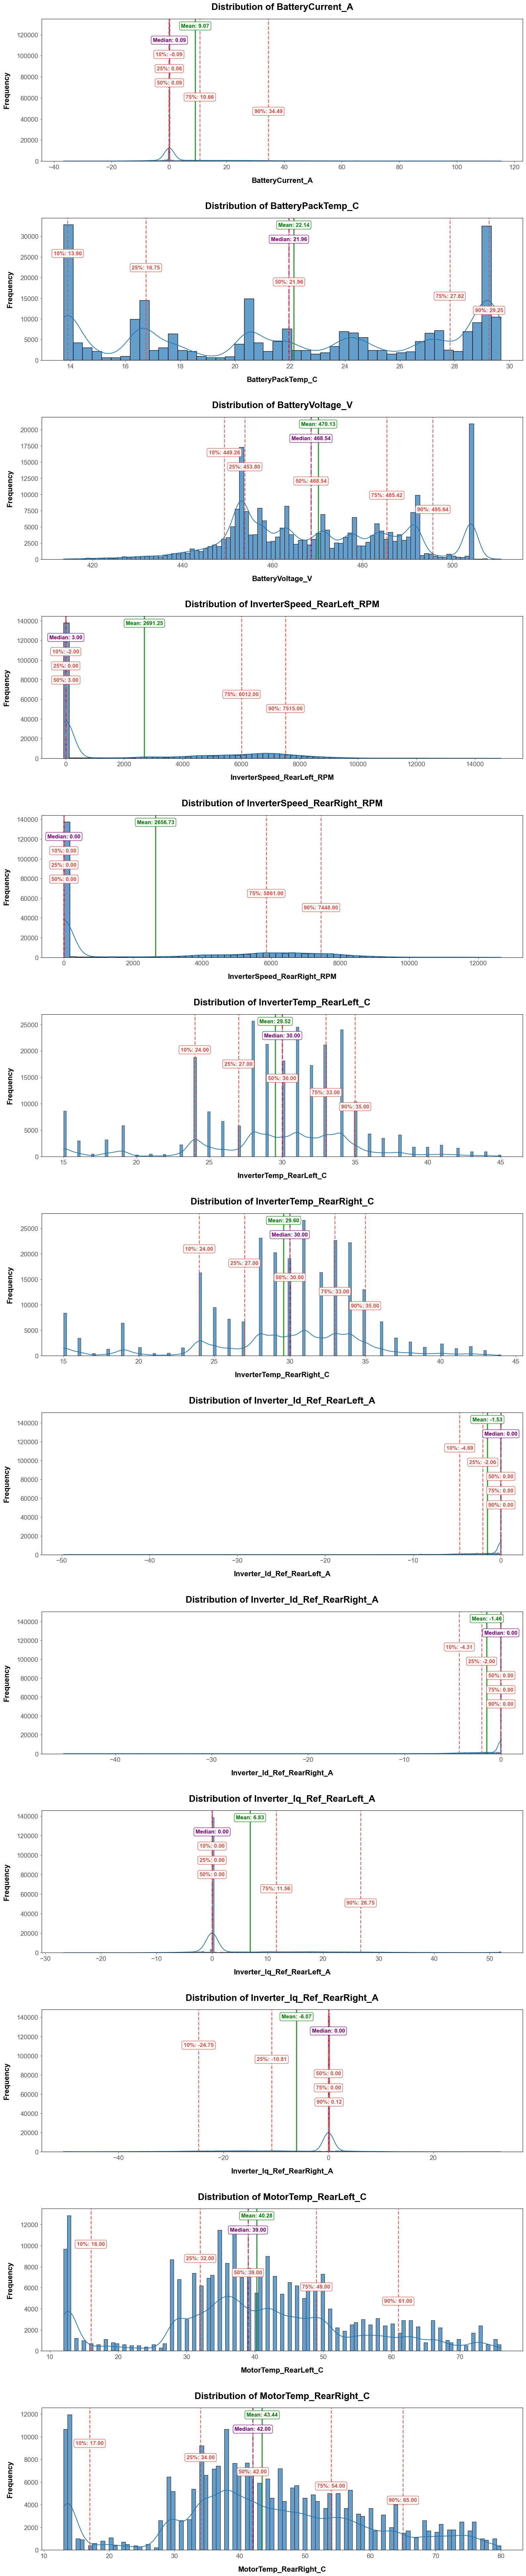


📌 Bin Distributions info:

🔹 BatteryCurrent_A:
   - num_bins: 6
   - quantile_edges: [-36.68999862670898, -0.0900000035762786, 0.0599999986588954, 0.0900000035762786, 10.65999984741211, 34.4900016784668, 115.23999786376952]
   - quantiles_used: [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

🔹 BatteryPackTemp_C:
   - num_bins: 6
   - quantile_edges: [13.75, 13.899999618530272, 16.75, 21.959999084472656, 27.81999969482422, 29.25, 29.68000030517578]
   - quantiles_used: [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

🔹 BatteryVoltage_V:
   - num_bins: 6
   - quantile_edges: [413.5, 449.260009765625, 453.7999877929688, 468.5400085449219, 485.4200134277344, 495.6400146484375, 510.7799987792969]
   - quantiles_used: [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

🔹 InverterSpeed_RearLeft_RPM:
   - num_bins: 6
   - quantile_edges: [-76.0, -2.0, 0.0, 3.0, 6012.0, 7515.0, 14881.0]
   - quantiles_used: [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

🔹 InverterSpeed_RearRight_RPM:
   - num_bins: 6
   - quantile_edges: [-11.0, 0.0, 0.0, 0

In [4]:
# Select the dataset file to analyze
dataset_path = next((file for file in datasets_imola if '20241128-imola.csv' in file), None)

if dataset_path:
    print(f"📂 Loading dataset: {dataset_path}")

    # Load the dataset into a DataFrame
    imola_20241128_df = pd.read_csv(dataset_path)

    # Display basic dataset information
    print("\n🔍 Dataset Overview:")
    print(imola_20241128_df.info())

    print("\n📊 First 5 Rows:")
    display(imola_20241128_df.head())

    print("\n📈 Summary Statistics:")
    display(imola_20241128_df.describe())

    # Get distribution overview with resulting bins
    bins_result = DataVisualizer.plot_distributions_overview(
        df=imola_20241128_df, 
        columns=imola_20241128_df.columns.difference(['InverterFault']).tolist(), 
        bins='auto', 
        quantiles=[0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
    )

    # Print bin suggestions in a formatted way
    print("\n📌 Bin Distributions info:")
    for column, stats in bins_result.items():
        print(f"\n🔹 {column}:")
        for key, value in stats.items():
            print(f"   - {key}: {value}")

else:
    print("⚠ Dataset '20241128-imola.csv' not found in the specified folder.")

### 🔷 Analyzing `20250113-imola` dataset

📂 Loading dataset: .\data\datasets-imola\20250113-imola.csv

🔍 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497553 entries, 0 to 497552
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   BatteryVoltage_V             497553 non-null  float64
 1   BatteryCurrent_A             497553 non-null  float64
 2   BatteryPackTemp_C            497553 non-null  float64
 3   InverterFault                497553 non-null  int64  
 4   InverterSpeed_RearLeft_RPM   497553 non-null  float64
 5   Inverter_Iq_Ref_RearLeft_A   497553 non-null  float64
 6   Inverter_Id_Ref_RearLeft_A   497553 non-null  float64
 7   MotorTemp_RearLeft_C         497553 non-null  float64
 8   InverterTemp_RearLeft_C      497553 non-null  float64
 9   InverterSpeed_RearRight_RPM  497553 non-null  float64
 10  Inverter_Iq_Ref_RearRight_A  497553 non-null  float64
 11  Inverter_Id_Ref_RearRight_A  497553 

BatteryVoltage_V  BatteryCurrent_A  BatteryPackTemp_C  InverterFault  \
0        502.880005              0.03               5.19              0   
1        502.899994              0.06               5.19              0   
2        502.899994              0.06               5.19              0   
3        502.899994              0.06               5.19              0   
4        502.899994              0.06               5.19              0   

   InverterSpeed_RearLeft_RPM  Inverter_Iq_Ref_RearLeft_A  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         3.0                         0.0   
3                         3.0                         0.0   
4                         3.0                         0.0   

   Inverter_Id_Ref_RearLeft_A  MotorTemp_RearLeft_C  InverterTemp_RearLeft_C  \
0                         0.0                   8.0                     11.0   
1                         0.0                   8.0                     11.0   
2                         0.0                   8.0                     11.0   
3                         0.0                   8.0                     11.0   
4                         0.0                   8.0                     11.0   

   InverterSpeed_RearRight_RPM  Inverter_Iq_Ref_RearRight_A  \
0                         31.0                          0.0   
1                         31.0                          0.0   
2                         29.0                          0.0   
3                         29.0                          0.0   
4                         29.0                          0.0   

   Inverter_Id_Ref_RearRight_A  MotorTemp_RearRight_C  \
0                          0.0                   10.0   
1                          0.0                   10.0   
2                          0.0                   10.0   
3                          0.0                   10.0   
4                          0.0                   10.0   

   InverterTemp_RearRight_C  
0                      13.0  
1                      13.0  
2                      13.0  
3                      13.0  
4                      13.0


📈 Summary Statistics:


BatteryVoltage_V  BatteryCurrent_A  BatteryPackTemp_C  InverterFault  \
count     497553.000000     497553.000000      497553.000000  497553.000000   
mean         463.542110          6.043057          15.061768       0.116209   
std           20.394413         14.703243           4.844621       0.320475   
min          385.820007        -13.500000           5.190000       0.000000   
25%          448.380005          0.000000          11.490000       0.000000   
50%          463.579987          0.090000          15.730000       0.000000   
75%          478.880005          4.360000          19.270000       0.000000   
max          503.100006        115.790001          23.639999       1.000000   

       InverterSpeed_RearLeft_RPM  Inverter_Iq_Ref_RearLeft_A  \
count               497553.000000               497553.000000   
mean                  2167.661799                    6.023563   
std                   2369.976221                   11.305793   
min                  -1439.000000                   -7.062500   
25%                      0.000000                    0.000000   
50%                   1748.000000                    0.000000   
75%                   4075.000000                    7.750000   
max                  14967.000000                   52.000000   

       Inverter_Id_Ref_RearLeft_A  MotorTemp_RearLeft_C  \
count               497553.000000         497553.000000   
mean                    -1.143004             33.947387   
std                      2.497655              9.819891   
min                    -52.937500              7.000000   
25%                     -1.312500             29.000000   
50%                      0.000000             33.000000   
75%                      0.000000             42.000000   
max                      0.000000             57.000000   

       InverterTemp_RearLeft_C  InverterSpeed_RearRight_RPM  \
count            497553.000000                497553.000000   
mean                 25.935744                  2133.151913   
std                   5.290186                  2304.850672   
min                   0.000000                  -573.000000   
25%                  24.000000                     0.000000   
50%                  25.000000                  1740.000000   
75%                  28.000000                  4023.000000   
max                  45.000000                 10113.000000   

       Inverter_Iq_Ref_RearRight_A  Inverter_Id_Ref_RearRight_A  \
count                497553.000000                497553.000000   
mean                     -5.894690                    -1.118844   
std                      11.040044                     2.452635   
min                     -50.500000                   -45.937500   
25%                      -7.562500                    -1.312500   
50%                       0.000000                     0.000000   
75%                       0.000000                     0.000000   
max                       6.875000                     0.000000   

       MotorTemp_RearRight_C  InverterTemp_RearRight_C  
count          497553.000000             497553.000000  
mean               37.482093                 26.616244  
std                11.906781                  5.114772  
min                 9.000000                  0.000000  
25%                30.000000                 24.000000  
50%                36.000000                 26.000000  
75%                47.000000                 29.000000  
max                67.000000                 46.000000

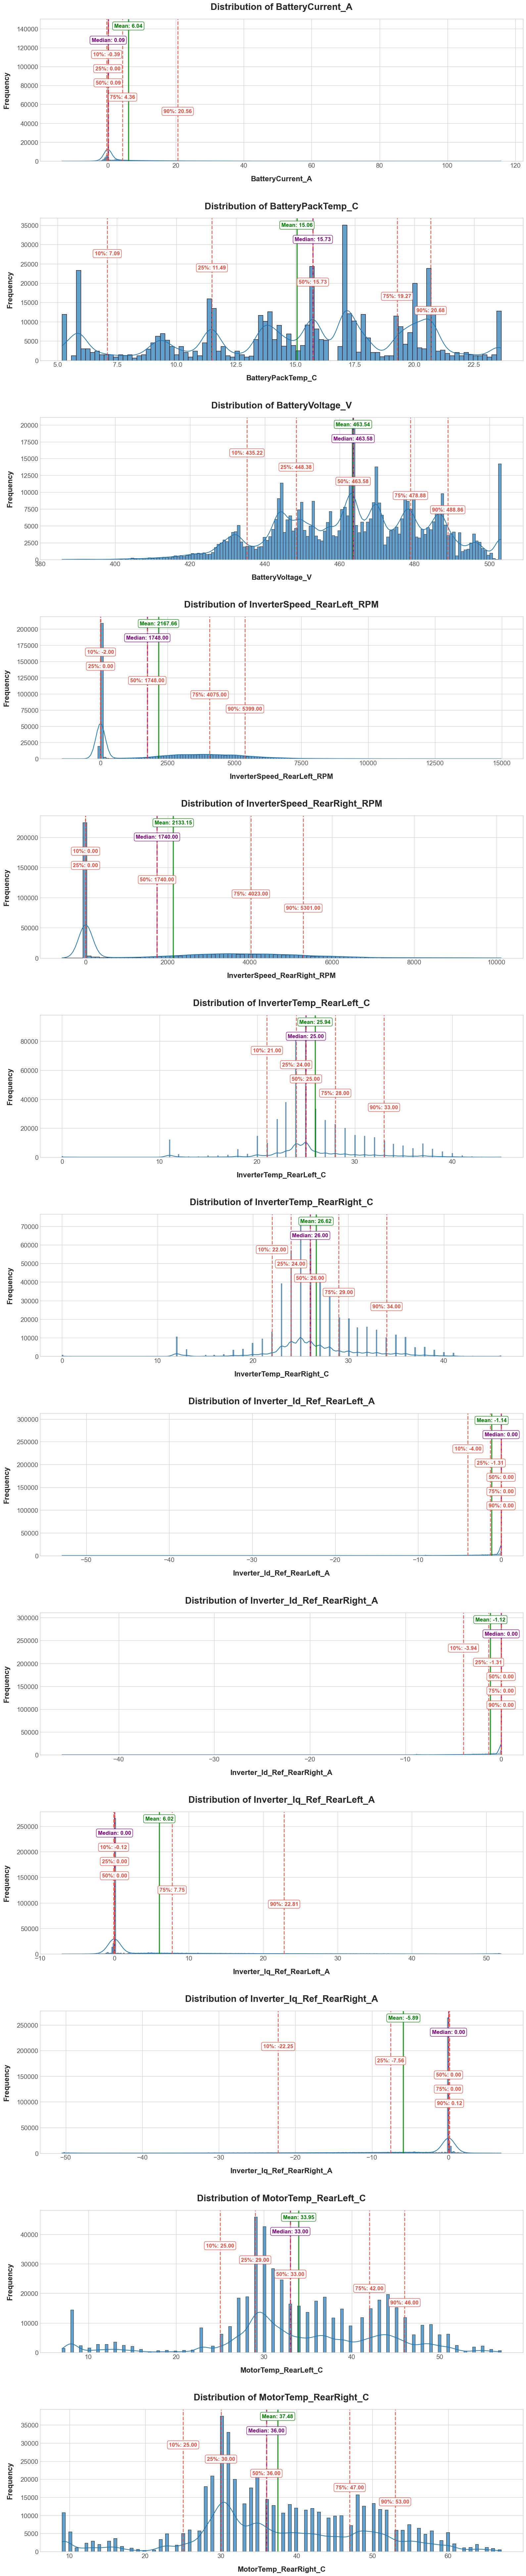


📌 Bin Distributions info:

🔹 BatteryCurrent_A:
   - num_bins: 6
   - quantile_edges: [-13.5, -0.3899999856948852, 0.0, 0.0900000035762786, 4.360000133514404, 20.559999465942383, 115.79000091552734]
   - quantiles_used: [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

🔹 BatteryPackTemp_C:
   - num_bins: 6
   - quantile_edges: [5.190000057220459, 7.090000152587891, 11.489999771118164, 15.729999542236328, 19.270000457763672, 20.68000030517578, 23.63999938964844]
   - quantiles_used: [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

🔹 BatteryVoltage_V:
   - num_bins: 6
   - quantile_edges: [385.8200073242188, 435.2200012207031, 448.3800048828125, 463.5799865722656, 478.8800048828125, 488.8599853515625, 503.1000061035156]
   - quantiles_used: [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

🔹 InverterSpeed_RearLeft_RPM:
   - num_bins: 6
   - quantile_edges: [-1439.0, -2.0, 0.0, 1748.0, 4075.0, 5399.0, 14967.0]
   - quantiles_used: [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

🔹 InverterSpeed_RearRight_RPM:
   - num_bins: 6
   - quanti

In [5]:
# Select the dataset file to analyze
dataset_path = next((file for file in datasets_imola if '20250113-imola.csv' in file), None)

if dataset_path:
    print(f"📂 Loading dataset: {dataset_path}")

    # Load the dataset into a DataFrame
    imola_20250113_df = pd.read_csv(dataset_path)

    # Display basic dataset information
    print("\n🔍 Dataset Overview:")
    print(imola_20250113_df.info())

    print("\n📊 First 5 Rows:")
    display(imola_20250113_df.head())

    print("\n📈 Summary Statistics:")
    display(imola_20250113_df.describe())

    # Get distribution overview with resulting bins
    bins_result = DataVisualizer.plot_distributions_overview(
        df=imola_20250113_df, 
        columns=imola_20250113_df.columns.difference(['InverterFault']).tolist(), 
        bins='auto', 
        quantiles=[0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
    )

    # Print bin suggestions in a formatted way
    print("\n📌 Bin Distributions info:")
    for column, stats in bins_result.items():
        print(f"\n🔹 {column}:")
        for key, value in stats.items():
            print(f"   - {key}: {value}")

else:
    print("⚠ Dataset '20250113-imola.csv' not found in the specified folder.")

### 🔷 Analyzing `20250114-imola` dataset

📂 Loading dataset: .\data\datasets-imola\20250114-imola.csv

🔍 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603724 entries, 0 to 603723
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   BatteryVoltage_V             603724 non-null  float64
 1   BatteryCurrent_A             603724 non-null  float64
 2   BatteryPackTemp_C            603724 non-null  float64
 3   InverterFault                603724 non-null  int64  
 4   InverterSpeed_RearLeft_RPM   603724 non-null  float64
 5   Inverter_Iq_Ref_RearLeft_A   603724 non-null  float64
 6   Inverter_Id_Ref_RearLeft_A   603724 non-null  float64
 7   MotorTemp_RearLeft_C         603724 non-null  float64
 8   InverterTemp_RearLeft_C      603724 non-null  float64
 9   InverterSpeed_RearRight_RPM  603724 non-null  float64
 10  Inverter_Iq_Ref_RearRight_A  603724 non-null  float64
 11  Inverter_Id_Ref_RearRight_A  603724 

BatteryVoltage_V  BatteryCurrent_A  BatteryPackTemp_C  InverterFault  \
0        500.220001              0.03          17.120001              0   
1        500.220001              0.03          17.120001              0   
2        500.220001              0.03          17.120001              0   
3        500.220001              0.03          17.120001              0   
4        500.220001              0.03          17.120001              0   

   InverterSpeed_RearLeft_RPM  Inverter_Iq_Ref_RearLeft_A  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                        -2.0                         0.0   
3                        -2.0                         0.0   
4                        -2.0                         0.0   

   Inverter_Id_Ref_RearLeft_A  MotorTemp_RearLeft_C  InverterTemp_RearLeft_C  \
0                         0.0                   9.0                     10.0   
1                         0.0                   9.0                     10.0   
2                         0.0                   9.0                     10.0   
3                         0.0                   9.0                     10.0   
4                         0.0                   9.0                     10.0   

   InverterSpeed_RearRight_RPM  Inverter_Iq_Ref_RearRight_A  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Inverter_Id_Ref_RearRight_A  MotorTemp_RearRight_C  \
0                          0.0                   10.0   
1                          0.0                   10.0   
2                          0.0                   10.0   
3                          0.0                   10.0   
4                          0.0                   10.0   

   InverterTemp_RearRight_C  
0                      10.0  
1                      10.0  
2                      10.0  
3                      10.0  
4                      10.0


📈 Summary Statistics:


BatteryVoltage_V  BatteryCurrent_A  BatteryPackTemp_C  InverterFault  \
count     603724.000000     603724.000000      603724.000000  603724.000000   
mean         475.379427          5.326524          26.169941       0.125693   
std           16.640589         14.433446           5.712431       0.331504   
min          405.399994        -14.930000          15.100000       0.000000   
25%          460.880005          0.030000          18.950001       0.000000   
50%          478.940002          0.060000          28.540001       0.000000   
75%          488.459991          0.700000          30.730000       0.000000   
max          503.260010        116.339996          33.150002       1.000000   

       InverterSpeed_RearLeft_RPM  Inverter_Iq_Ref_RearLeft_A  \
count               603724.000000               603724.000000   
mean                  1833.484712                    5.054590   
std                   2463.637554                   11.118464   
min                   -326.000000                   -7.625000   
25%                      0.000000                    0.000000   
50%                      3.000000                    0.000000   
75%                   3873.000000                    1.875000   
max                  15312.000000                   51.875000   

       Inverter_Id_Ref_RearLeft_A  MotorTemp_RearLeft_C  \
count               603724.000000         603724.000000   
mean                    -0.956816             31.860244   
std                      2.350098             11.030861   
min                    -52.937500              4.000000   
25%                     -0.437500             27.000000   
50%                      0.000000             31.000000   
75%                      0.000000             38.000000   
max                      0.000000             66.000000   

       InverterTemp_RearLeft_C  InverterSpeed_RearRight_RPM  \
count            603724.000000                603724.000000   
mean                 26.206788                  1802.161027   
std                   5.909046                  2405.234361   
min                   0.000000                  -239.000000   
25%                  23.000000                     0.000000   
50%                  26.000000                     0.000000   
75%                  30.000000                  3841.000000   
max                  45.000000                 11698.000000   

       Inverter_Iq_Ref_RearRight_A  Inverter_Id_Ref_RearRight_A  \
count                603724.000000                603724.000000   
mean                     -4.978979                    -0.954104   
std                      10.923923                     2.402517   
min                     -50.375000                   -46.125000   
25%                      -2.062500                    -0.437500   
50%                       0.000000                     0.000000   
75%                       0.000000                     0.000000   
max                       7.375000                     0.000000   

       MotorTemp_RearRight_C  InverterTemp_RearRight_C  
count          603724.000000             603724.000000  
mean               35.229350                 26.970097  
std                12.961616                  6.125237  
min                 4.000000                  0.000000  
25%                29.000000                 24.000000  
50%                34.000000                 27.000000  
75%                42.000000                 31.000000  
max                77.000000                 46.000000

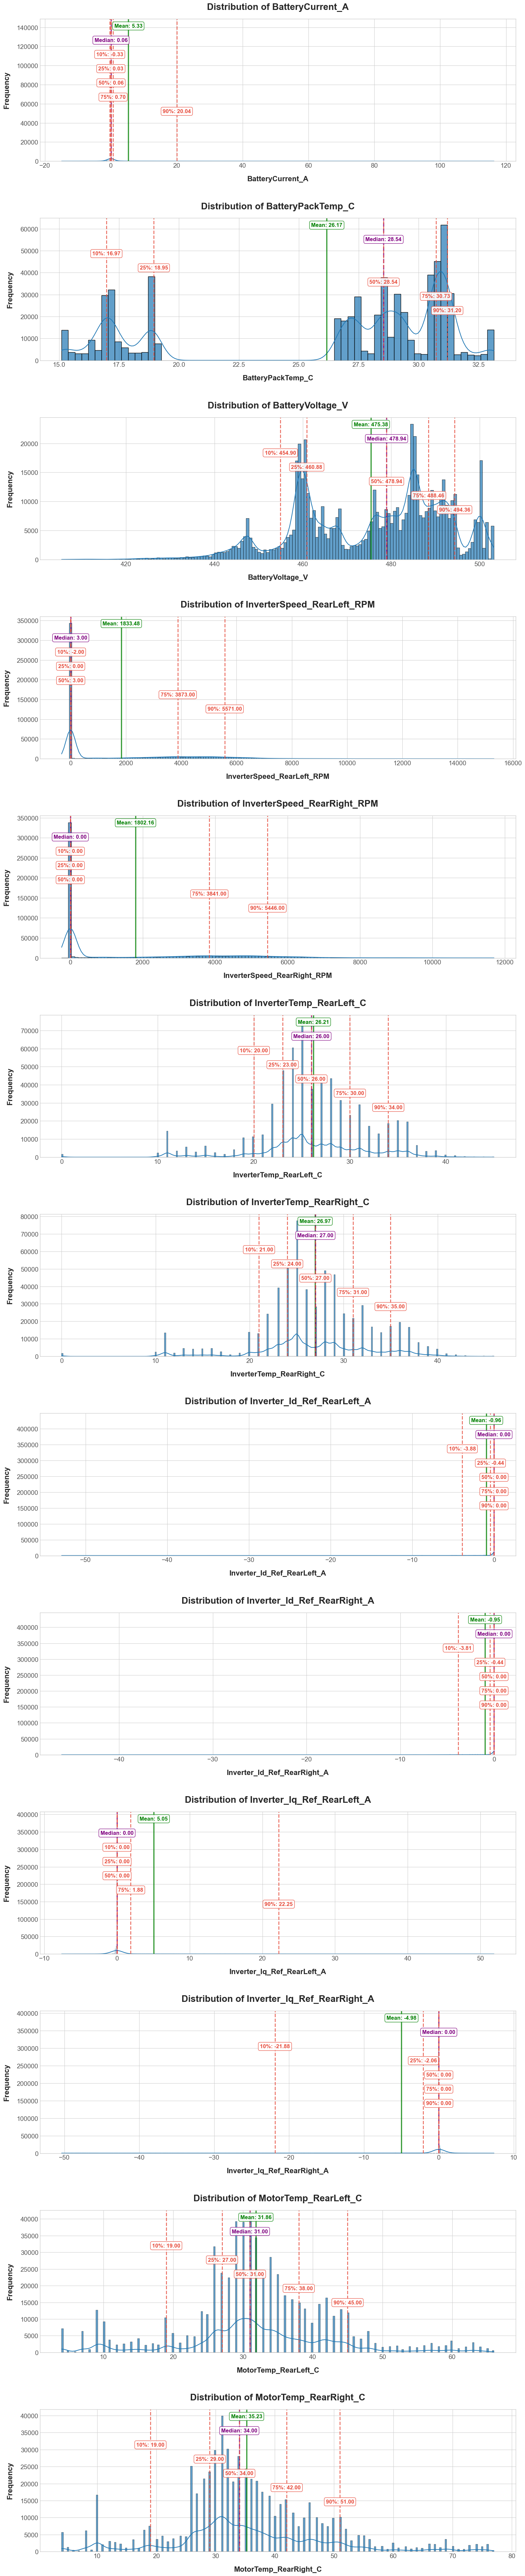


📌 Bin Distributions info:

🔹 BatteryCurrent_A:
   - num_bins: 6
   - quantile_edges: [-14.93000030517578, -0.3300000131130218, 0.0299999993294477, 0.0599999986588954, 0.699999988079071, 20.040000915527344, 116.33999633789062]
   - quantiles_used: [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

🔹 BatteryPackTemp_C:
   - num_bins: 6
   - quantile_edges: [15.100000381469728, 16.969999313354492, 18.950000762939453, 28.540000915527344, 30.729999542236328, 31.200000762939453, 33.150001525878906]
   - quantiles_used: [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

🔹 BatteryVoltage_V:
   - num_bins: 6
   - quantile_edges: [405.3999938964844, 454.8999938964844, 460.8800048828125, 478.9400024414063, 488.4599914550781, 494.3599853515625, 503.260009765625]
   - quantiles_used: [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

🔹 InverterSpeed_RearLeft_RPM:
   - num_bins: 6
   - quantile_edges: [-326.0, -2.0, 0.0, 3.0, 3873.0, 5571.0, 15312.0]
   - quantiles_used: [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

🔹 InverterSpeed_RearRight_RPM:
 

In [6]:
# Select the dataset file to analyze
dataset_path = next((file for file in datasets_imola if '20250114-imola.csv' in file), None)

if dataset_path:
    print(f"📂 Loading dataset: {dataset_path}")

    # Load the dataset into a DataFrame
    imola_20250114_df = pd.read_csv(dataset_path)

    # Display basic dataset information
    print("\n🔍 Dataset Overview:")
    print(imola_20250114_df.info())

    print("\n📊 First 5 Rows:")
    display(imola_20250114_df.head())

    print("\n📈 Summary Statistics:")
    display(imola_20250114_df.describe())

    # Get distribution overview with resulting bins
    bins_result = DataVisualizer.plot_distributions_overview(
        df=imola_20250114_df, 
        columns=imola_20250114_df.columns.difference(['InverterFault']).tolist(), 
        bins='auto', 
        quantiles=[0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]
    )

    # Print bin suggestions in a formatted way
    print("\n📌 Bin Distributions info:")
    for column, stats in bins_result.items():
        print(f"\n🔹 {column}:")
        for key, value in stats.items():
            print(f"   - {key}: {value}")

else:
    print("⚠ Dataset '20250114-imola.csv' not found in the specified folder.")

## 🪓 Manual discretization with `cut` method

**Define the bins intervals and labels for each feature**

In [7]:
# Configure different discretization for each column
discretizion_columns_configs = {
    'BatteryCurrent_A': {
        'bins': [-np.inf, 0.09, 20., np.inf],
        'labels': ['0_Idle', '1_Normal', '2_High']
    },
    'BatteryPackTemp_C': {
        'bins': [-np.inf, 16., 28., np.inf],
        'labels': ['0_Low', '1_Normal', '2_High']
    },
    'BatteryVoltage_V': {
        'bins': [-np.inf, 450., 480., np.inf],
        'labels': ['0_Low', '1_Medium', '2_High']
    },
    'InverterSpeed_RearLeft_RPM': {
        'bins': [-np.inf, 0., 4000., np.inf],
        'labels': ['0_Idle', '1_Normal_Pace', '2_High_Pace']
    },
    'InverterSpeed_RearRight_RPM': {
        'bins': [-np.inf, 0., 4000., np.inf],
        'labels': ['0_Idle', '1_Normal_Pace', '2_High_Pace']
    },
    'InverterTemp_RearLeft_C': {
        'bins': [-np.inf, 20., 30., np.inf],
        'labels': ['0_Low', '1_Normal', '2_High']
    },
    'InverterTemp_RearRight_C': {
        'bins': [-np.inf, 20., 30., np.inf],
        'labels': ['0_Low', '1_Normal', '2_High']
    },
    'Inverter_Id_Ref_RearLeft_A': {
        'bins': [-np.inf, -4., -1., np.inf],
        'labels': ['0_Very_Negative', '1_Negative', '2_Close_Zero']
    },
    'Inverter_Id_Ref_RearRight_A': {
        'bins': [-np.inf, -4., -1., np.inf],
        'labels': ['0_Very_Negative', '1_Negative', '2_Close_Zero']
    },
    'Inverter_Iq_Ref_RearRight_A': {
        'bins': [-np.inf, -4, 4, np.inf],
        'labels': ['0_Negative', '1_Close_Zero', '2_Positive']
    },
    'Inverter_Iq_Ref_RearLeft_A': {
        'bins': [-np.inf, -4, 4, np.inf],
        'labels': ['0_Negative', '1_Close_Zero', '2_Positive']
    },
    'MotorTemp_RearLeft_C': {
        'bins': [-np.inf, 25., 55., np.inf],
        'labels': ['0_Low', '1_Normal', '2_High']
    },
    'MotorTemp_RearRight_C': {
        'bins': [-np.inf, 25., 55., np.inf],
        'labels': ['0_Low', '1_Normal', '2_High']
    },
}

### 🔷 Discretizing `20241128-imola` dataset with `cut`

In [8]:
# Perform discretization on numeric columns using predefined bin configurations
discretization_info, discretized_imola_20241128_df = DataDiscretizer.discretize_columns(
    df=imola_20241128_df, 
    columns_config=discretizion_columns_configs,
    method='cut'
)

# Display summary of discretization results
print("\n📊 Discretization Overview:")
for column, info in discretization_info.items():
    print(f"\n🔹 Column: {column}")
    print(f"   - Method: {info['method']}")
    print(f"   - Bin Edges: {info['bin_edges']}")
    print(f"   - Number of Bins: {info['bin_count']}")
    print("   - Value Counts:")
    print(info['value_counts'].to_string())


📊 Discretization Overview:

🔹 Column: BatteryCurrent_A
   - Method: Threshold-based
   - Bin Edges: [ -inf  0.09 20.     inf]
   - Number of Bins: 3
   - Value Counts:
BatteryCurrent_A
0_Idle      103222
1_Normal     99478
2_High       45748

🔹 Column: BatteryPackTemp_C
   - Method: Threshold-based
   - Bin Edges: [-inf  16.  28.  inf]
   - Number of Bins: 3
   - Value Counts:
BatteryPackTemp_C
0_Low        44102
1_Normal    143430
2_High       60916

🔹 Column: BatteryVoltage_V
   - Method: Threshold-based
   - Bin Edges: [-inf 450. 480.  inf]
   - Number of Bins: 3
   - Value Counts:
BatteryVoltage_V
0_Low        27047
1_Medium    139398
2_High       82003

🔹 Column: InverterSpeed_RearLeft_RPM
   - Method: Threshold-based
   - Bin Edges: [ -inf    0. 4000.   inf]
   - Number of Bins: 3
   - Value Counts:
InverterSpeed_RearLeft_RPM
0_Idle           89932
1_Normal_Pace    65861
2_High_Pace      92655

🔹 Column: InverterSpeed_RearRight_RPM
   - Method: Threshold-based
   - Bin Edges: [ 

In [9]:
# Perform discretization on numeric columns using predefined bin configurations
binarization_info, discretized_imola_20241128_df = DataDiscretizer.binarize_columns(
    df=discretized_imola_20241128_df, 
    columns=['InverterFault'],
    thresholds={'InverterFault': 0.5},
)

# Display summary of binarization results
print("\n📊 Binarization Overview:")
for column, info in binarization_info.items():
    print(f"\n🔹 Column: {column}")
    print(f"   - Threshold: {info['threshold']}")
    print(f"   - True (%): {info['percentage_true']}")
    print("   - Value Counts:")
    print(info['value_counts'].to_string())


📊 Binarization Overview:

🔹 Column: InverterFault
   - Threshold: 0.5
   - True (%): 0.0
   - Value Counts:
InverterFault
False    248448


In [10]:
# Display first few rows of discretized data
print("\n📋 Sample of Discretized Data:")
display(discretized_imola_20241128_df.head())


📋 Sample of Discretized Data:


BatteryVoltage_V BatteryCurrent_A BatteryPackTemp_C  InverterFault  \
0           2_High           0_Idle             0_Low          False   
1           2_High           0_Idle             0_Low          False   
2           2_High           0_Idle             0_Low          False   
3           2_High           0_Idle             0_Low          False   
4           2_High           0_Idle             0_Low          False   

  InverterSpeed_RearLeft_RPM Inverter_Iq_Ref_RearLeft_A  \
0                     0_Idle               1_Close_Zero   
1                     0_Idle               1_Close_Zero   
2                     0_Idle               1_Close_Zero   
3                     0_Idle               1_Close_Zero   
4                     0_Idle               1_Close_Zero   

  Inverter_Id_Ref_RearLeft_A MotorTemp_RearLeft_C InverterTemp_RearLeft_C  \
0               2_Close_Zero                0_Low                   0_Low   
1               2_Close_Zero                0_Low                   0_Low   
2               2_Close_Zero                0_Low                   0_Low   
3               2_Close_Zero                0_Low                   0_Low   
4               2_Close_Zero                0_Low                   0_Low   

  InverterSpeed_RearRight_RPM Inverter_Iq_Ref_RearRight_A  \
0                      0_Idle                1_Close_Zero   
1                      0_Idle                1_Close_Zero   
2                      0_Idle                1_Close_Zero   
3                      0_Idle                1_Close_Zero   
4                      0_Idle                1_Close_Zero   

  Inverter_Id_Ref_RearRight_A MotorTemp_RearRight_C InverterTemp_RearRight_C  
0                2_Close_Zero                 0_Low                    0_Low  
1                2_Close_Zero                 0_Low                    0_Low  
2                2_Close_Zero                 0_Low                    0_Low  
3                2_Close_Zero                 0_Low                    0_Low  
4                2_Close_Zero                 0_Low                    0_Low

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

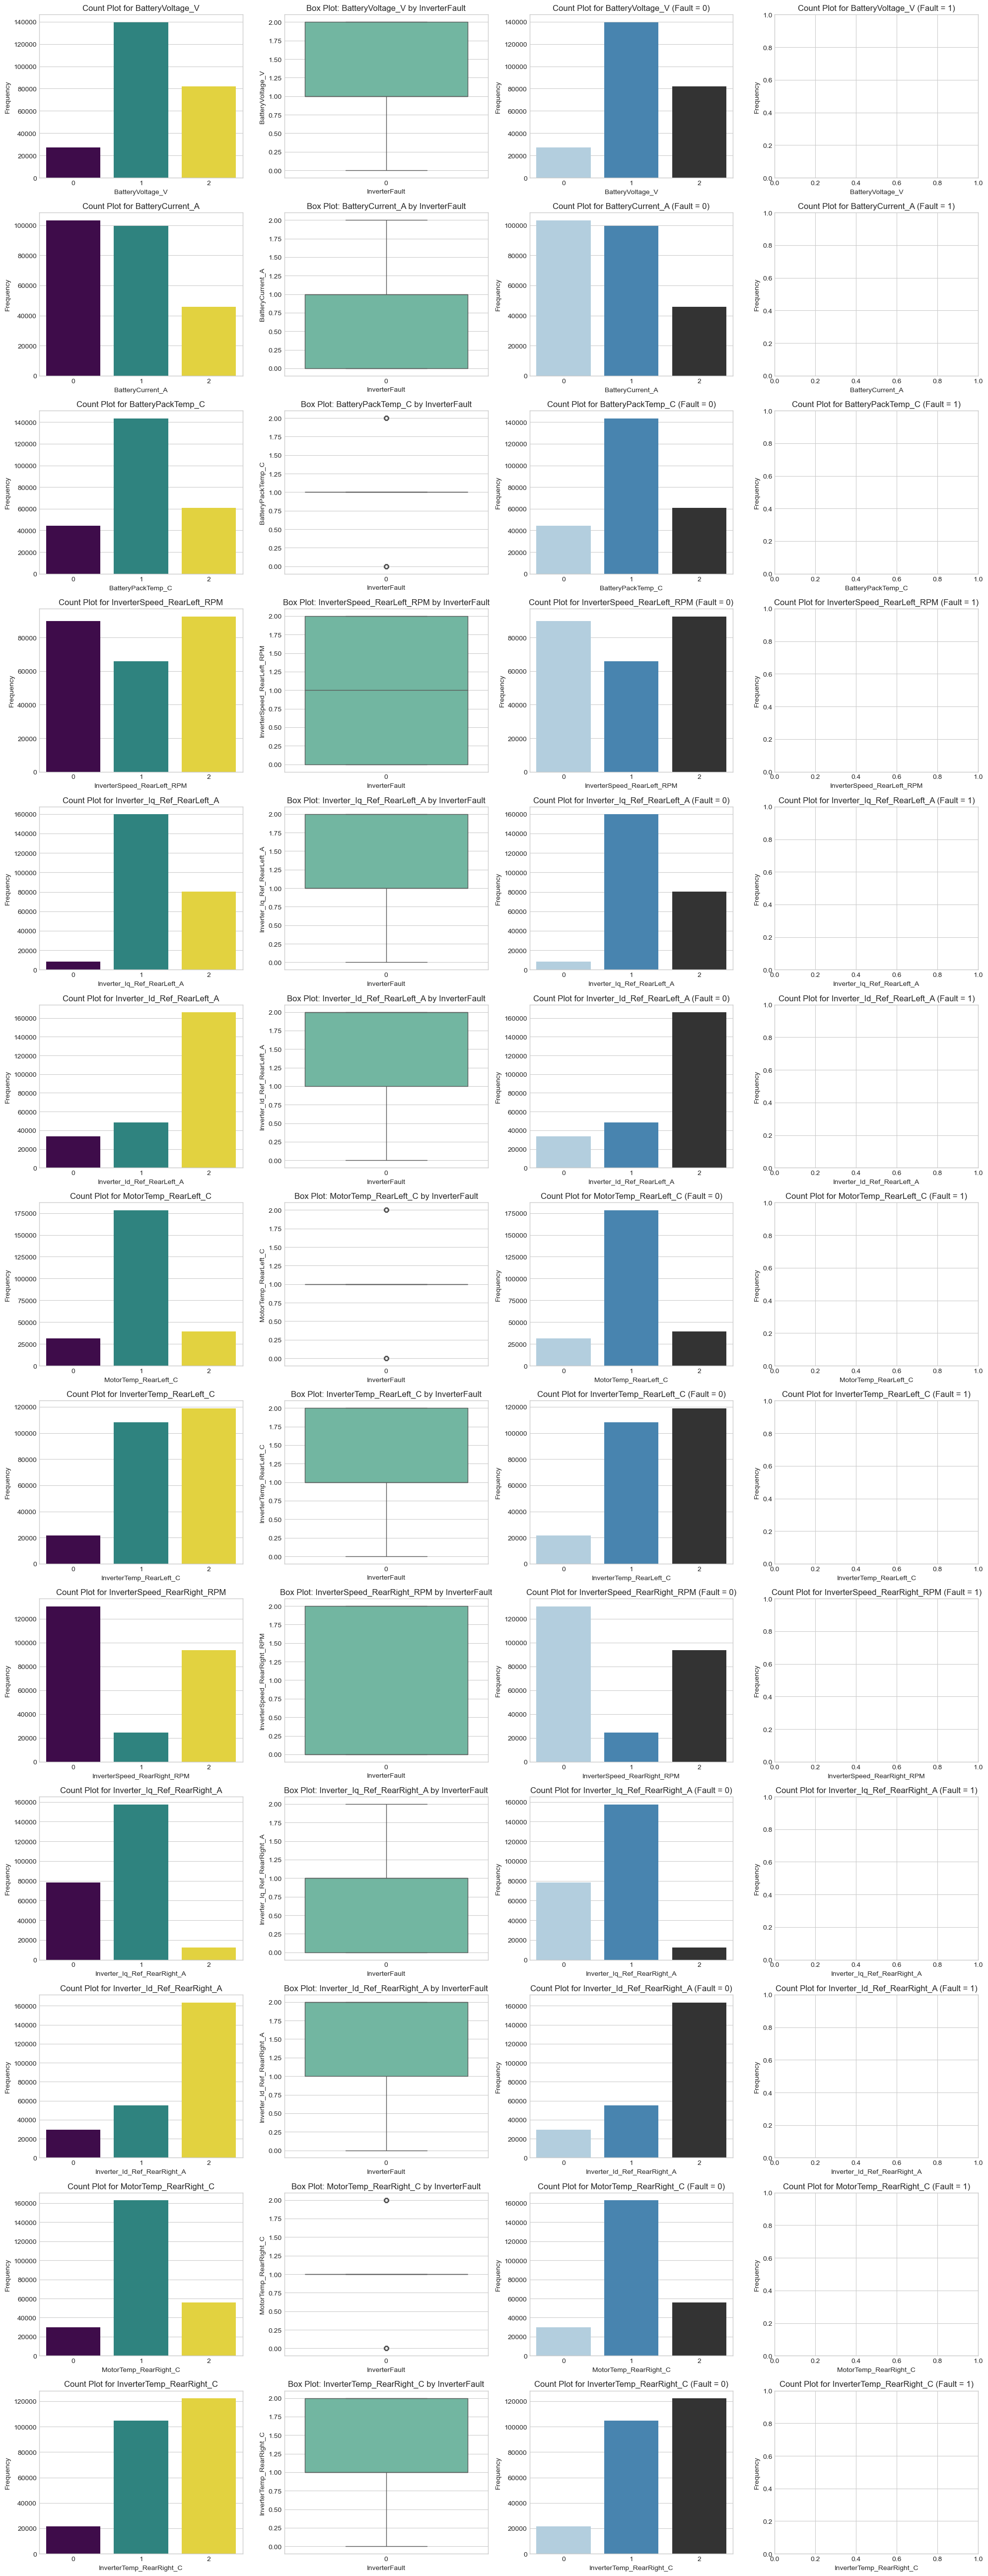

In [11]:
encoded_imola20241128_df, encoding_info = DataEncoder.encode_categorical_columns(
    df=discretized_imola_20241128_df, 
    encoding_strategy='ordinal'
)

DataVisualizer.plot_discrete_distributions(
    df=encoded_imola20241128_df,
    fault_col='InverterFault'
)

In [12]:
# Define output file path
output_file = os.path.join(DISCRETIZED_ORIGINAL_DATASETS_IMOLA_FOLDER_NAME, 'discr-20241128-imola.csv')

# Save the discretized dataset
DataProcessor.save_dataset(discretized_imola_20241128_df, output_file, file_format="csv")
print(f"✅ Saved discretized data to: {output_file}")

Dataset with shape (248448, 14), saved successfully at .\data\discretized-datasets-imola\discr-20241128-imola.csv (csv).
✅ Saved discretized data to: .\data\discretized-datasets-imola\discr-20241128-imola.csv


### 🔷 Discretizing `20250113-imola` dataset with `cut`

In [13]:
# Perform discretization on numeric columns using predefined bin configurations
discretization_info, discretized_imola_20250113_df = DataDiscretizer.discretize_columns(
    df=imola_20250113_df, 
    columns_config=discretizion_columns_configs,
    method='cut'
)

# Display summary of discretization results
print("\n📊 Discretization Overview:")
for column, info in discretization_info.items():
    print(f"\n🔹 Column: {column}")
    print(f"   - Method: {info['method']}")
    print(f"   - Bin Edges: {info['bin_edges']}")
    print(f"   - Number of Bins: {info['bin_count']}")
    print("   - Value Counts:")
    print(info['value_counts'].to_string())


📊 Discretization Overview:

🔹 Column: BatteryCurrent_A
   - Method: Threshold-based
   - Bin Edges: [ -inf  0.09 20.     inf]
   - Number of Bins: 3
   - Value Counts:
BatteryCurrent_A
0_Idle      227235
1_Normal    219245
2_High       51073

🔹 Column: BatteryPackTemp_C
   - Method: Threshold-based
   - Bin Edges: [-inf  16.  28.  inf]
   - Number of Bins: 3
   - Value Counts:
BatteryPackTemp_C
0_Low       268152
1_Normal    229401
2_High           0

🔹 Column: BatteryVoltage_V
   - Method: Threshold-based
   - Bin Edges: [-inf 450. 480.  inf]
   - Number of Bins: 3
   - Value Counts:
BatteryVoltage_V
0_Low       141034
1_Medium    244765
2_High      111754

🔹 Column: InverterSpeed_RearLeft_RPM
   - Method: Threshold-based
   - Bin Edges: [ -inf    0. 4000.   inf]
   - Number of Bins: 3
   - Value Counts:
InverterSpeed_RearLeft_RPM
0_Idle           147953
1_Normal_Pace    220363
2_High_Pace      129237

🔹 Column: InverterSpeed_RearRight_RPM
   - Method: Threshold-based
   - Bin Edges:

In [14]:
# Perform discretization on numeric columns using predefined bin configurations
binarization_info, discretized_imola_20250113_df = DataDiscretizer.binarize_columns(
    df=discretized_imola_20250113_df, 
    columns=['InverterFault'],
    thresholds={'InverterFault': 0.5},
)

# Display summary of binarization results
print("\n📊 Binarization Overview:")
for column, info in binarization_info.items():
    print(f"\n🔹 Column: {column}")
    print(f"   - Threshold: {info['threshold']}")
    print(f"   - True (%): {info['percentage_true']}")
    print("   - Value Counts:")
    print(info['value_counts'].to_string())


📊 Binarization Overview:

🔹 Column: InverterFault
   - Threshold: 0.5
   - True (%): 11.620872550260977
   - Value Counts:
InverterFault
False    439733
True      57820


In [15]:
# Display first few rows of discretized data
print("\n📋 Sample of Discretized Data:")
display(discretized_imola_20250113_df.head())


📋 Sample of Discretized Data:


BatteryVoltage_V BatteryCurrent_A BatteryPackTemp_C  InverterFault  \
0           2_High           0_Idle             0_Low          False   
1           2_High           0_Idle             0_Low          False   
2           2_High           0_Idle             0_Low          False   
3           2_High           0_Idle             0_Low          False   
4           2_High           0_Idle             0_Low          False   

  InverterSpeed_RearLeft_RPM Inverter_Iq_Ref_RearLeft_A  \
0                     0_Idle               1_Close_Zero   
1                     0_Idle               1_Close_Zero   
2              1_Normal_Pace               1_Close_Zero   
3              1_Normal_Pace               1_Close_Zero   
4              1_Normal_Pace               1_Close_Zero   

  Inverter_Id_Ref_RearLeft_A MotorTemp_RearLeft_C InverterTemp_RearLeft_C  \
0               2_Close_Zero                0_Low                   0_Low   
1               2_Close_Zero                0_Low                   0_Low   
2               2_Close_Zero                0_Low                   0_Low   
3               2_Close_Zero                0_Low                   0_Low   
4               2_Close_Zero                0_Low                   0_Low   

  InverterSpeed_RearRight_RPM Inverter_Iq_Ref_RearRight_A  \
0               1_Normal_Pace                1_Close_Zero   
1               1_Normal_Pace                1_Close_Zero   
2               1_Normal_Pace                1_Close_Zero   
3               1_Normal_Pace                1_Close_Zero   
4               1_Normal_Pace                1_Close_Zero   

  Inverter_Id_Ref_RearRight_A MotorTemp_RearRight_C InverterTemp_RearRight_C  
0                2_Close_Zero                 0_Low                    0_Low  
1                2_Close_Zero                 0_Low                    0_Low  
2                2_Close_Zero                 0_Low                    0_Low  
3                2_Close_Zero                 0_Low                    0_Low  
4                2_Close_Zero                 0_Low                    0_Low

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

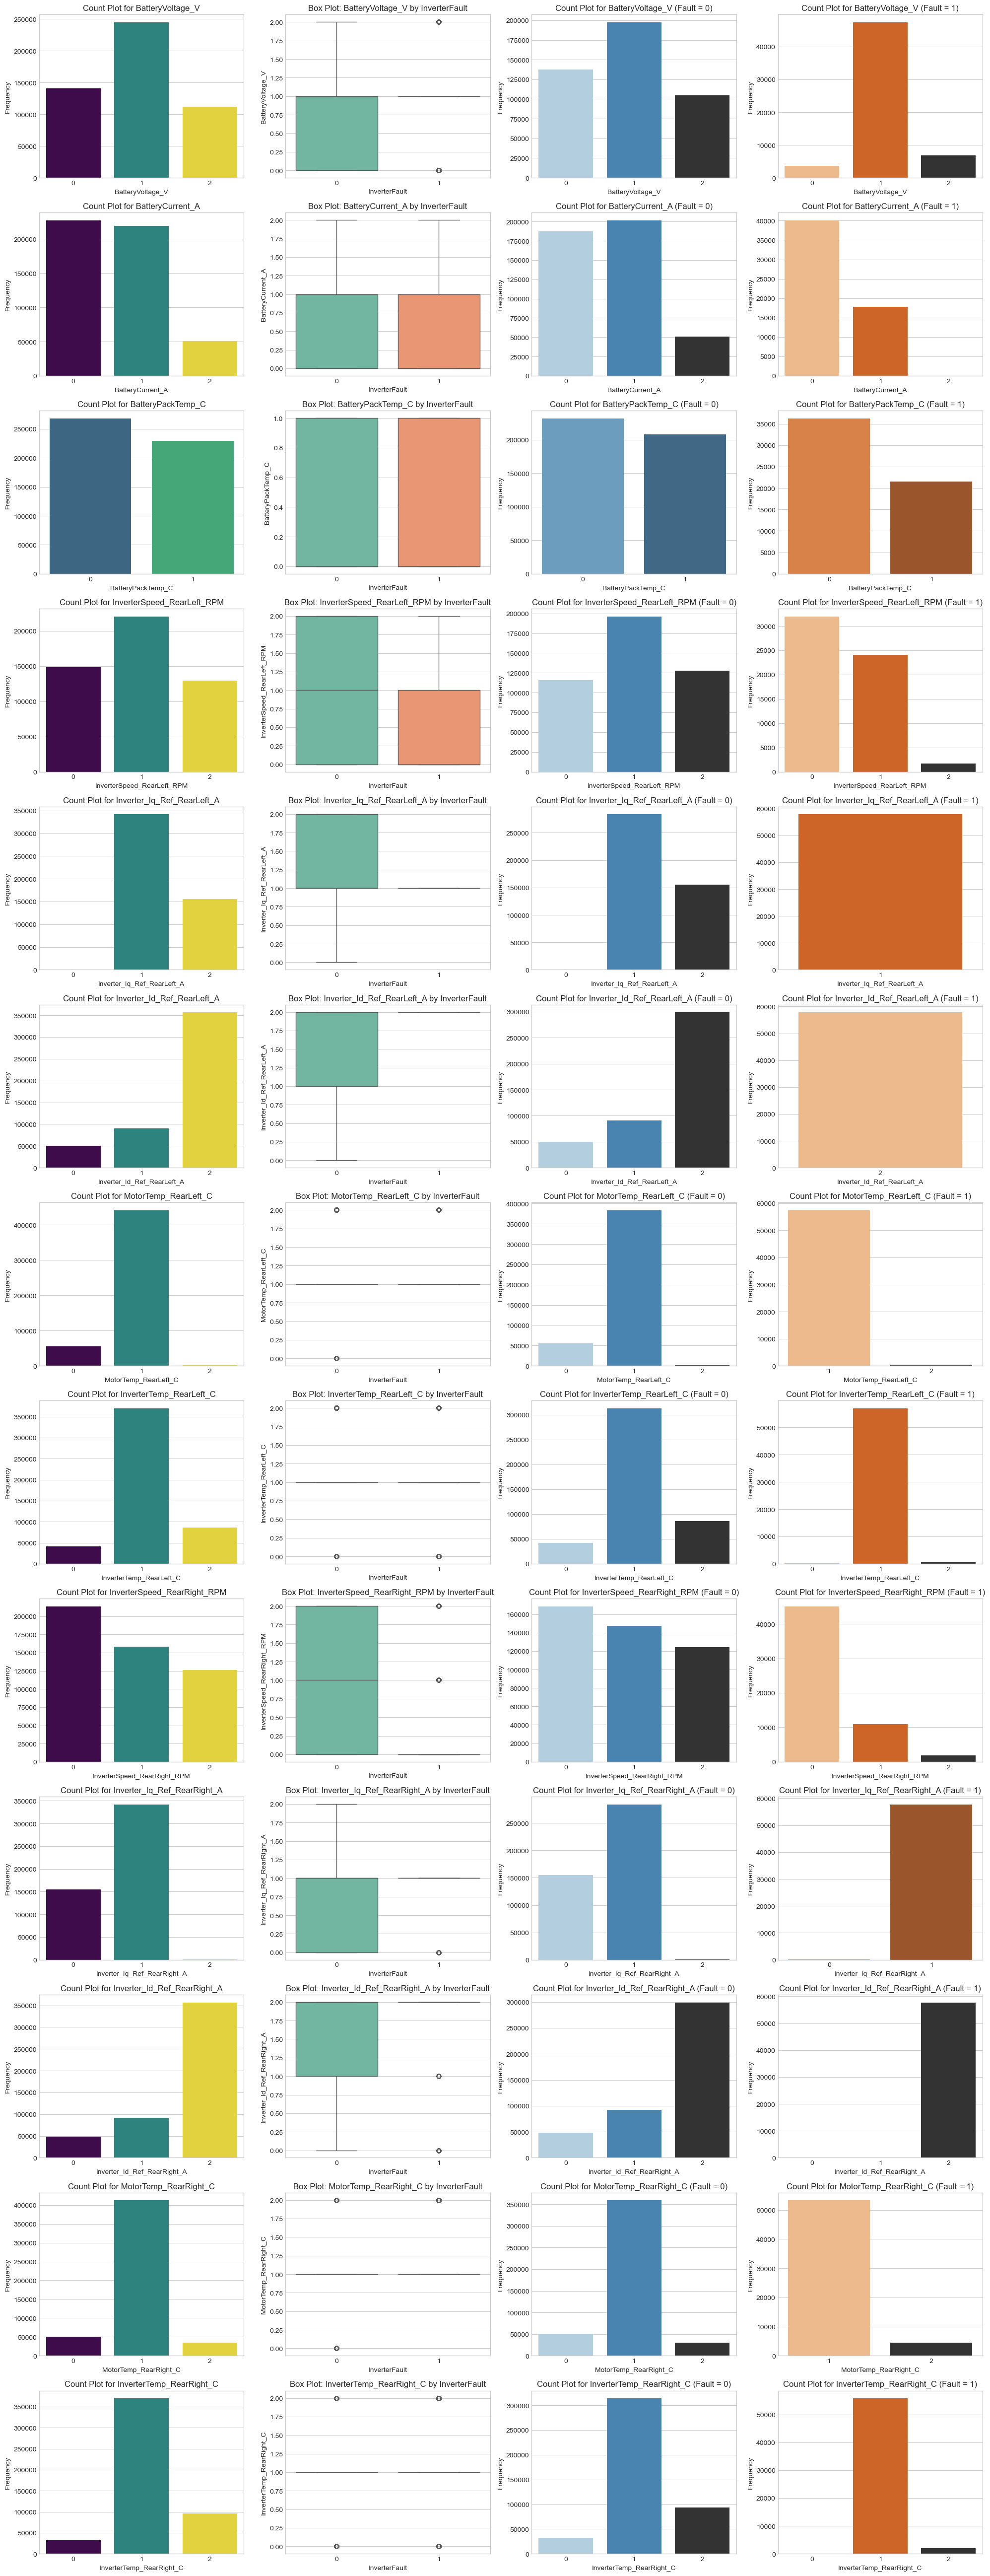

In [16]:
# Encode categorical columns using the specified encoding strategy
encoded_imola_20250113_df, _ = DataEncoder.encode_categorical_columns(
    df=discretized_imola_20250113_df, 
    encoding_strategy='ordinal'
)

# Visualize the distribution of discrete variables with respect to 'InverterFault'
DataVisualizer.plot_discrete_distributions(
    df=encoded_imola_20250113_df,
    fault_col='InverterFault'
)

In [17]:
# Define output file path
output_file = os.path.join(DISCRETIZED_ORIGINAL_DATASETS_IMOLA_FOLDER_NAME, 'discr-20250113-imola.csv')

# Save the discretized dataset
DataProcessor.save_dataset(discretized_imola_20250113_df, output_file, file_format="csv")
print(f"✅ Saved discretized data to: {output_file}")

Dataset with shape (497553, 14), saved successfully at .\data\discretized-datasets-imola\discr-20250113-imola.csv (csv).
✅ Saved discretized data to: .\data\discretized-datasets-imola\discr-20250113-imola.csv


### 🔷 Discretizing `20250114-imola` dataset with `cut`

In [18]:
# Perform discretization on numeric columns using predefined bin configurations
discretization_info, discretized_imola_20250114_df = DataDiscretizer.discretize_columns(
    df=imola_20250114_df, 
    columns_config=discretizion_columns_configs,
    method='cut'
)

# Display summary of discretization results
print("\n📊 Discretization Overview:")
for column, info in discretization_info.items():
    print(f"\n🔹 Column: {column}")
    print(f"   - Method: {info['method']}")
    print(f"   - Bin Edges: {info['bin_edges']}")
    print(f"   - Number of Bins: {info['bin_count']}")
    print("   - Value Counts:")
    print(info['value_counts'].to_string())


📊 Discretization Overview:

🔹 Column: BatteryCurrent_A
   - Method: Threshold-based
   - Bin Edges: [ -inf  0.09 20.     inf]
   - Number of Bins: 3
   - Value Counts:
BatteryCurrent_A
0_Idle      365956
1_Normal    177326
2_High       60442

🔹 Column: BatteryPackTemp_C
   - Method: Threshold-based
   - Bin Edges: [-inf  16.  28.  inf]
   - Number of Bins: 3
   - Value Counts:
BatteryPackTemp_C
0_Low        21071
1_Normal    240217
2_High      342436

🔹 Column: BatteryVoltage_V
   - Method: Threshold-based
   - Bin Edges: [-inf 450. 480.  inf]
   - Number of Bins: 3
   - Value Counts:
BatteryVoltage_V
0_Low        48085
1_Medium    266979
2_High      288660

🔹 Column: InverterSpeed_RearLeft_RPM
   - Method: Threshold-based
   - Bin Edges: [ -inf    0. 4000.   inf]
   - Number of Bins: 3
   - Value Counts:
InverterSpeed_RearLeft_RPM
0_Idle           220654
1_Normal_Pace    239224
2_High_Pace      143846

🔹 Column: InverterSpeed_RearRight_RPM
   - Method: Threshold-based
   - Bin Edges:

In [19]:
# Perform discretization on numeric columns using predefined bin configurations
binarization_info, discretized_imola_20250114_df = DataDiscretizer.binarize_columns(
    df=discretized_imola_20250114_df, 
    columns=['InverterFault'],
    thresholds={'InverterFault': 0.5},
)

# Display summary of binarization results
print("\n📊 Binarization Overview:")
for column, info in binarization_info.items():
    print(f"\n🔹 Column: {column}")
    print(f"   - Threshold: {info['threshold']}")
    print(f"   - True (%): {info['percentage_true']}")
    print("   - Value Counts:")
    print(info['value_counts'].to_string())


📊 Binarization Overview:

🔹 Column: InverterFault
   - Threshold: 0.5
   - True (%): 12.56931975538491
   - Value Counts:
InverterFault
False    527840
True      75884


In [20]:
# Display first few rows of discretized data
print("\n📋 Sample of Discretized Data:")
display(discretized_imola_20250114_df.head())


📋 Sample of Discretized Data:


BatteryVoltage_V BatteryCurrent_A BatteryPackTemp_C  InverterFault  \
0           2_High           0_Idle          1_Normal          False   
1           2_High           0_Idle          1_Normal          False   
2           2_High           0_Idle          1_Normal          False   
3           2_High           0_Idle          1_Normal          False   
4           2_High           0_Idle          1_Normal          False   

  InverterSpeed_RearLeft_RPM Inverter_Iq_Ref_RearLeft_A  \
0                     0_Idle               1_Close_Zero   
1                     0_Idle               1_Close_Zero   
2                     0_Idle               1_Close_Zero   
3                     0_Idle               1_Close_Zero   
4                     0_Idle               1_Close_Zero   

  Inverter_Id_Ref_RearLeft_A MotorTemp_RearLeft_C InverterTemp_RearLeft_C  \
0               2_Close_Zero                0_Low                   0_Low   
1               2_Close_Zero                0_Low                   0_Low   
2               2_Close_Zero                0_Low                   0_Low   
3               2_Close_Zero                0_Low                   0_Low   
4               2_Close_Zero                0_Low                   0_Low   

  InverterSpeed_RearRight_RPM Inverter_Iq_Ref_RearRight_A  \
0                      0_Idle                1_Close_Zero   
1                      0_Idle                1_Close_Zero   
2                      0_Idle                1_Close_Zero   
3                      0_Idle                1_Close_Zero   
4                      0_Idle                1_Close_Zero   

  Inverter_Id_Ref_RearRight_A MotorTemp_RearRight_C InverterTemp_RearRight_C  
0                2_Close_Zero                 0_Low                    0_Low  
1                2_Close_Zero                 0_Low                    0_Low  
2                2_Close_Zero                 0_Low                    0_Low  
3                2_Close_Zero                 0_Low                    0_Low  
4                2_Close_Zero                 0_Low                    0_Low

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

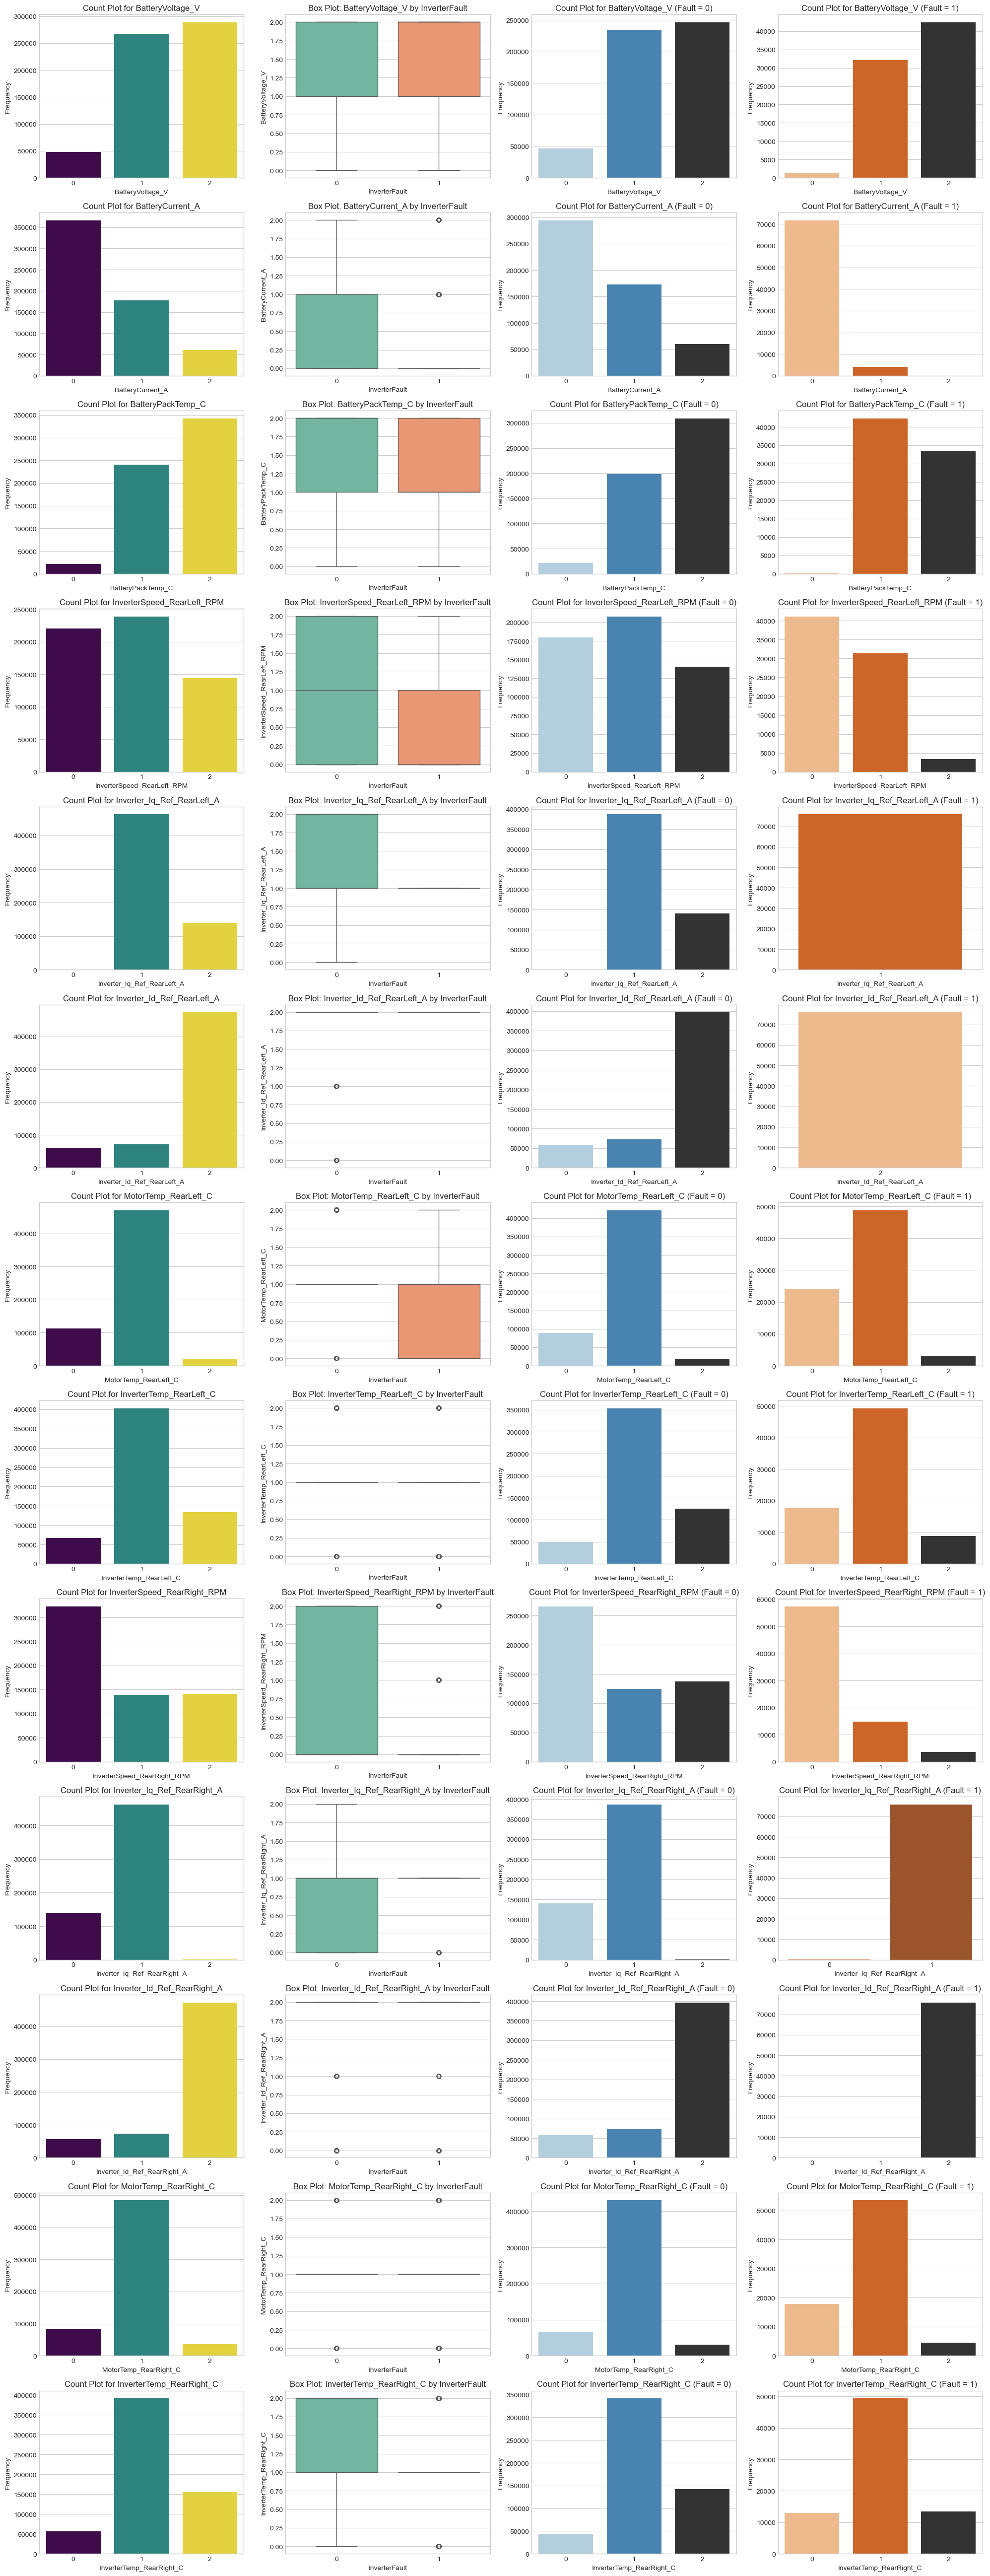

In [21]:
# Encode categorical columns using the specified encoding strategy
encoded_imola_20250114_df, _ = DataEncoder.encode_categorical_columns(
    df=discretized_imola_20250114_df, 
    encoding_strategy='ordinal'
)

# Visualize the distribution of discrete variables with respect to 'InverterFault'
DataVisualizer.plot_discrete_distributions(
    df=encoded_imola_20250114_df,
    fault_col='InverterFault'
)

In [22]:
# Define output file path
output_file = os.path.join(DISCRETIZED_ORIGINAL_DATASETS_IMOLA_FOLDER_NAME, 'discr-20250114-imola.csv')

# Save the discretized dataset
DataProcessor.save_dataset(discretized_imola_20250114_df, output_file, file_format="csv")
print(f"✅ Saved discretized data to: {output_file}")

Dataset with shape (603724, 14), saved successfully at .\data\discretized-datasets-imola\discr-20250114-imola.csv (csv).
✅ Saved discretized data to: .\data\discretized-datasets-imola\discr-20250114-imola.csv


## 🍡 Unsupervised discretization with `KMeans` method

**Define the number of bins for each feature**

In [30]:
# Define the number of bins for each feature (K-Means discretization)
kmeans_bins = {
    'BatteryVoltage_V': 3,
    'BatteryCurrent_A': 3,
    'BatteryPackTemp_C': 4,
    'InverterSpeed_RearLeft_RPM': 6,
    'Inverter_Iq_Ref_RearLeft_A': 3,
    'Inverter_Id_Ref_RearLeft_A': 6,
    'MotorTemp_RearLeft_C': 4,
    'InverterTemp_RearLeft_C': 7,
    'InverterSpeed_RearRight_RPM': 6,
    'Inverter_Iq_Ref_RearRight_A': 3,
    'Inverter_Id_Ref_RearRight_A': 6,
    'MotorTemp_RearRight_C': 4,
    'InverterTemp_RearRight_C': 7,
}

### 🔷 Discretizing `20241128-imola` dataset with `KMeans`

In [31]:
# Perform K-Means discretization
kmeans_discretized_imola_20241128_df, kmeans_result = DataDiscretizer.discretize_kmeans(
    df=imola_20241128_df.drop(columns=['InverterFault']), 
    n_bins=list(kmeans_bins.values())  # Extract bin values in correct order
)

# Display K-Means discretization results in a readable format
print("\n" + "="*80)
print("🔍 K-Means Discretization Summary")
print("="*80)

for col, details in kmeans_result.items():
    print(f"\n📌 Feature: {col}")
    print("-" * 60)
    print(f"  📊 Method: {details['method']}")
    print(f"  🔢 Number of Bins: {details['bin_count']}")
    print(f"  📍 Bin Edges: {details['bin_edges']}")
    print(f"  🎯 Cluster Centers: {details['cluster_centers']}")
    print(f"  📈 Value Counts: {details['value_counts']}")
    print(f"  🔄 Mapping: {details['mapping']}")
    print("-" * 60)

Processing column: BatteryVoltage_V
BatteryVoltage_V: Using provided n_bins: 3
BatteryVoltage_V discretized into 3 bins.
Processing column: BatteryCurrent_A
BatteryCurrent_A: Using provided n_bins: 3
BatteryCurrent_A discretized into 3 bins.
Processing column: BatteryPackTemp_C
BatteryPackTemp_C: Using provided n_bins: 4
BatteryPackTemp_C discretized into 4 bins.
Processing column: InverterSpeed_RearLeft_RPM
InverterSpeed_RearLeft_RPM: Using provided n_bins: 6
InverterSpeed_RearLeft_RPM discretized into 6 bins.
Processing column: Inverter_Iq_Ref_RearLeft_A
Inverter_Iq_Ref_RearLeft_A: Using provided n_bins: 3
Inverter_Iq_Ref_RearLeft_A discretized into 3 bins.
Processing column: Inverter_Id_Ref_RearLeft_A
Inverter_Id_Ref_RearLeft_A: Using provided n_bins: 6
Inverter_Id_Ref_RearLeft_A discretized into 6 bins.
Processing column: MotorTemp_RearLeft_C
MotorTemp_RearLeft_C: Using provided n_bins: 4
MotorTemp_RearLeft_C discretized into 4 bins.
Processing column: InverterTemp_RearLeft_C
Inver

In [33]:
# Perform discretization on numeric columns using predefined bin configurations
binarization_info, binarized_fault_df = DataDiscretizer.binarize_columns(
    df=imola_20241128_df['InverterFault'].to_frame(),
    columns=['InverterFault'],
    thresholds={'InverterFault': 0.5},
    labels={'InverterFault': [0, 1]}
)

# Add the binzarized column to discretized dataframe
kmeans_discretized_imola_20241128_df['InverterFault'] = binarized_fault_df['InverterFault']

# Display summary of binarization results
print("\n📊 Binarization Overview:")
for column, info in binarization_info.items():
    print(f"\n🔹 Column: {column}")
    print(f"   - Threshold: {info['threshold']}")
    print(f"   - True (%): {info['percentage_true']}")
    print("   - Value Counts:")
    print(info['value_counts'].to_string())


📊 Binarization Overview:

🔹 Column: InverterFault
   - Threshold: 0.5
   - True (%): 0.0
   - Value Counts:
InverterFault
0    248448


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

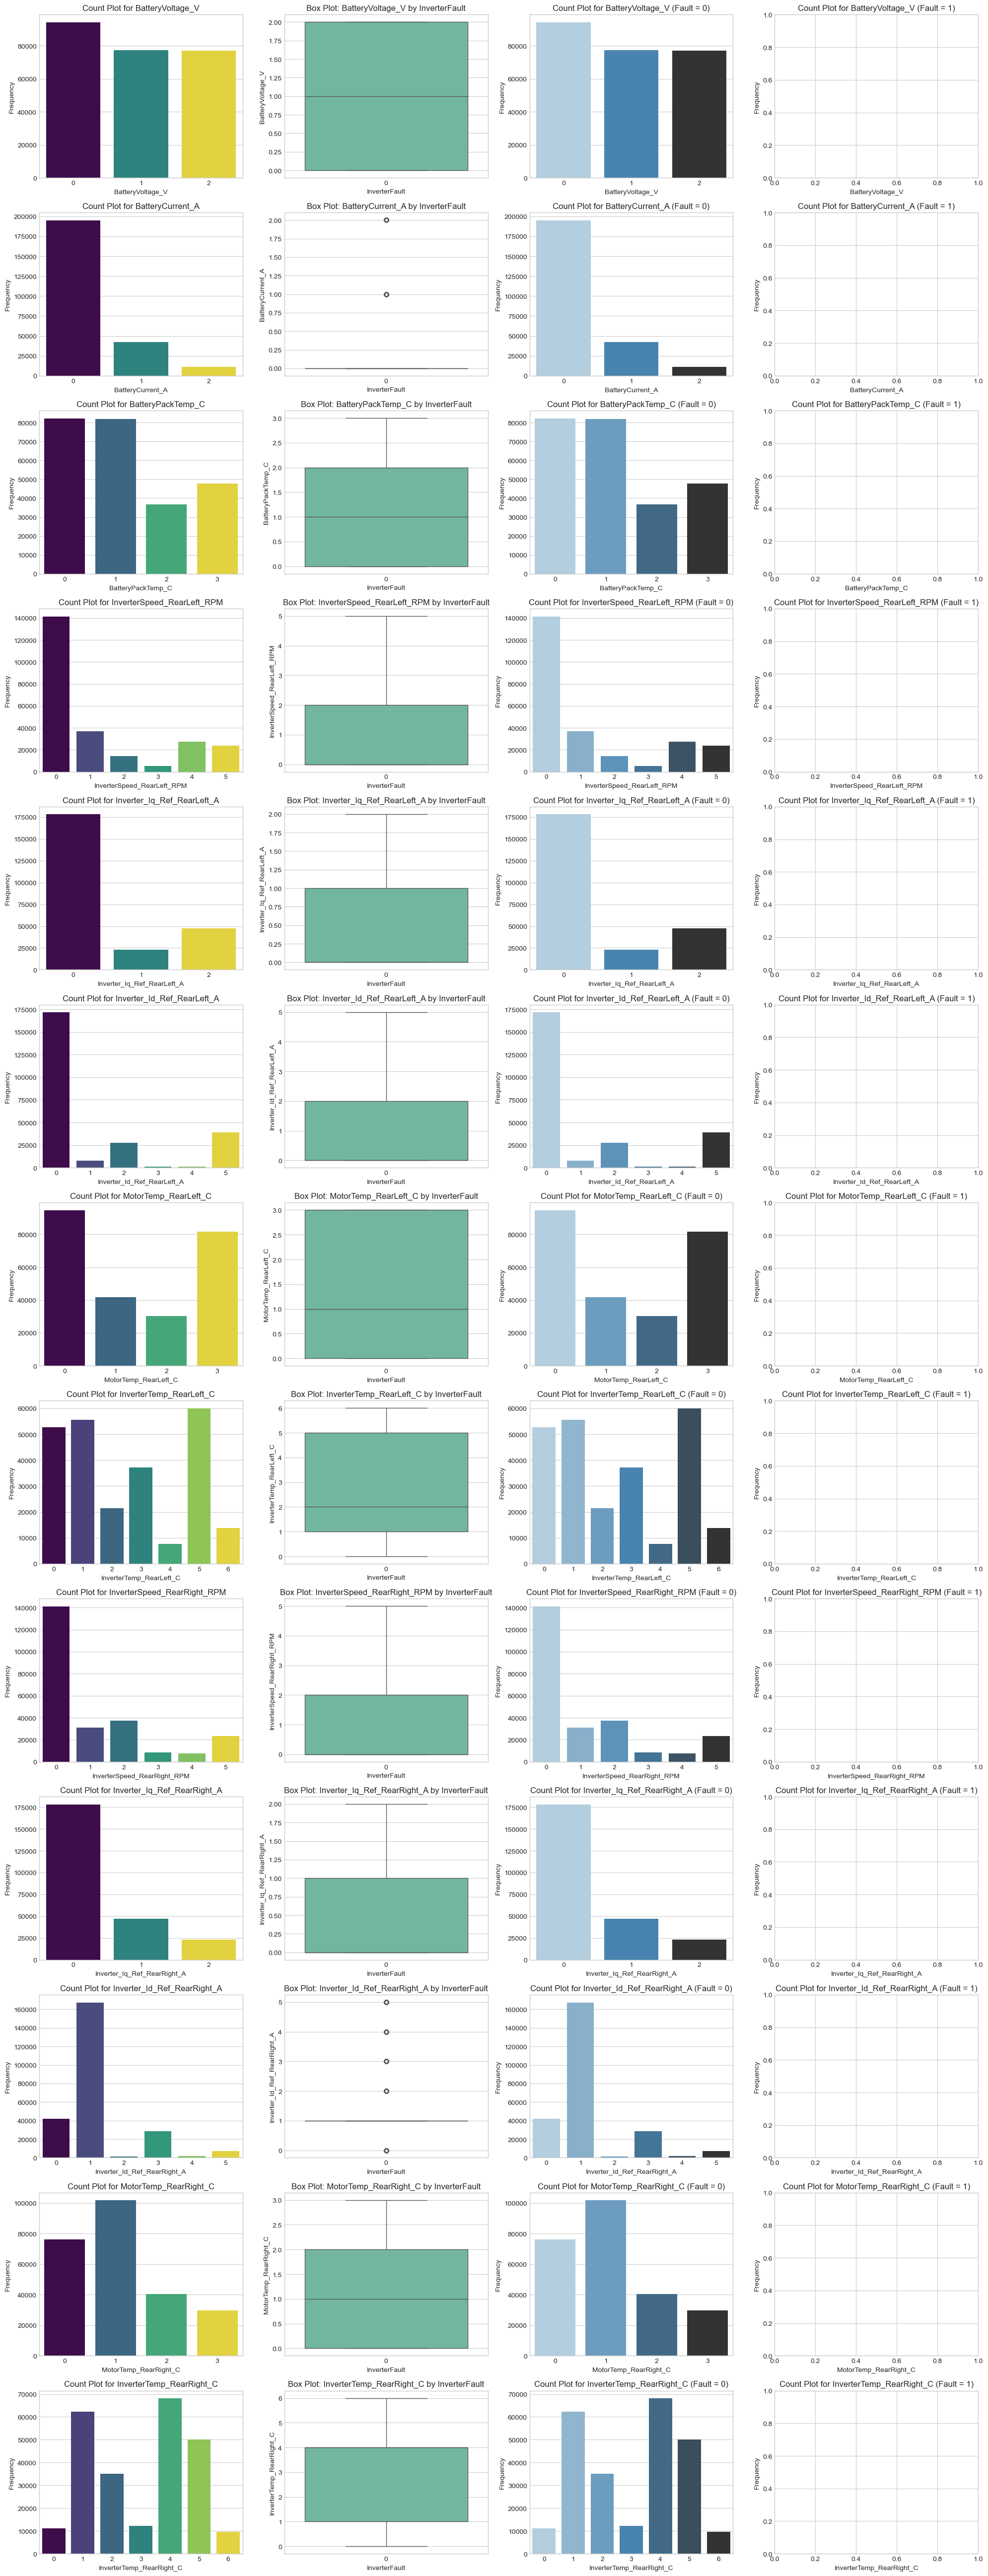

In [34]:
# Encode categorical columns using the specified encoding strategy
encoded_imola_20241128_df, _ = DataEncoder.encode_categorical_columns(
    df=kmeans_discretized_imola_20241128_df, 
    encoding_strategy='ordinal'
)

# Visualize the distribution of discrete variables with respect to 'InverterFault'
DataVisualizer.plot_discrete_distributions(
    df=encoded_imola_20241128_df,
    fault_col='InverterFault'
)

In [35]:
# Define output file path
output_file = os.path.join(DISCRETIZED_ORIGINAL_DATASETS_IMOLA_FOLDER_NAME, 'kmeans', 'discr-20241128-imola.csv')

# Save the discretized dataset
DataProcessor.save_dataset(kmeans_discretized_imola_20241128_df, output_file, file_format="csv")
print(f"✅ Saved discretized (KMeans) data to: {output_file}")

Dataset with shape (248448, 14), saved successfully at .\data\discretized-datasets-imola\kmeans\discr-20241128-imola.csv (csv).
✅ Saved discretized (KMeans) data to: .\data\discretized-datasets-imola\kmeans\discr-20241128-imola.csv


### 🔷 Discretizing `20250113-imola` dataset with `KMeans`

In [36]:
# Perform K-Means discretization
kmeans_discretized_imola_20250113_df, kmeans_result = DataDiscretizer.discretize_kmeans(
    df=imola_20250113_df.drop(columns=['InverterFault']), 
    n_bins=list(kmeans_bins.values())  # Extract bin values in correct order
)

# Display K-Means discretization results in a readable format
print("\n" + "="*80)
print("🔍 K-Means Discretization Summary")
print("="*80)

for col, details in kmeans_result.items():
    print(f"\n📌 Feature: {col}")
    print("-" * 60)
    print(f"  📊 Method: {details['method']}")
    print(f"  🔢 Number of Bins: {details['bin_count']}")
    print(f"  📍 Bin Edges: {details['bin_edges']}")
    print(f"  🎯 Cluster Centers: {details['cluster_centers']}")
    print(f"  📈 Value Counts: {details['value_counts']}")
    print(f"  🔄 Mapping: {details['mapping']}")
    print("-" * 60)

Processing column: BatteryVoltage_V
BatteryVoltage_V: Using provided n_bins: 3
BatteryVoltage_V discretized into 3 bins.
Processing column: BatteryCurrent_A
BatteryCurrent_A: Using provided n_bins: 3
BatteryCurrent_A discretized into 3 bins.
Processing column: BatteryPackTemp_C
BatteryPackTemp_C: Using provided n_bins: 4
BatteryPackTemp_C discretized into 4 bins.
Processing column: InverterSpeed_RearLeft_RPM
InverterSpeed_RearLeft_RPM: Using provided n_bins: 6
InverterSpeed_RearLeft_RPM discretized into 6 bins.
Processing column: Inverter_Iq_Ref_RearLeft_A
Inverter_Iq_Ref_RearLeft_A: Using provided n_bins: 3
Inverter_Iq_Ref_RearLeft_A discretized into 3 bins.
Processing column: Inverter_Id_Ref_RearLeft_A
Inverter_Id_Ref_RearLeft_A: Using provided n_bins: 6
Inverter_Id_Ref_RearLeft_A discretized into 6 bins.
Processing column: MotorTemp_RearLeft_C
MotorTemp_RearLeft_C: Using provided n_bins: 4
MotorTemp_RearLeft_C discretized into 4 bins.
Processing column: InverterTemp_RearLeft_C
Inver

In [37]:
# Perform discretization on numeric columns using predefined bin configurations
binarization_info, binarized_fault_df = DataDiscretizer.binarize_columns(
    df=imola_20250113_df['InverterFault'].to_frame(),
    columns=['InverterFault'],
    thresholds={'InverterFault': 0.5},
    labels={'InverterFault': [0, 1]}
)

# Add the binzarized column to discretized dataframe
kmeans_discretized_imola_20250113_df['InverterFault'] = binarized_fault_df['InverterFault']

# Display summary of binarization results
print("\n📊 Binarization Overview:")
for column, info in binarization_info.items():
    print(f"\n🔹 Column: {column}")
    print(f"   - Threshold: {info['threshold']}")
    print(f"   - True (%): {info['percentage_true']}")
    print("   - Value Counts:")
    print(info['value_counts'].to_string())


📊 Binarization Overview:

🔹 Column: InverterFault
   - Threshold: 0.5
   - True (%): 11.620872550260977
   - Value Counts:
InverterFault
0    439733
1     57820


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

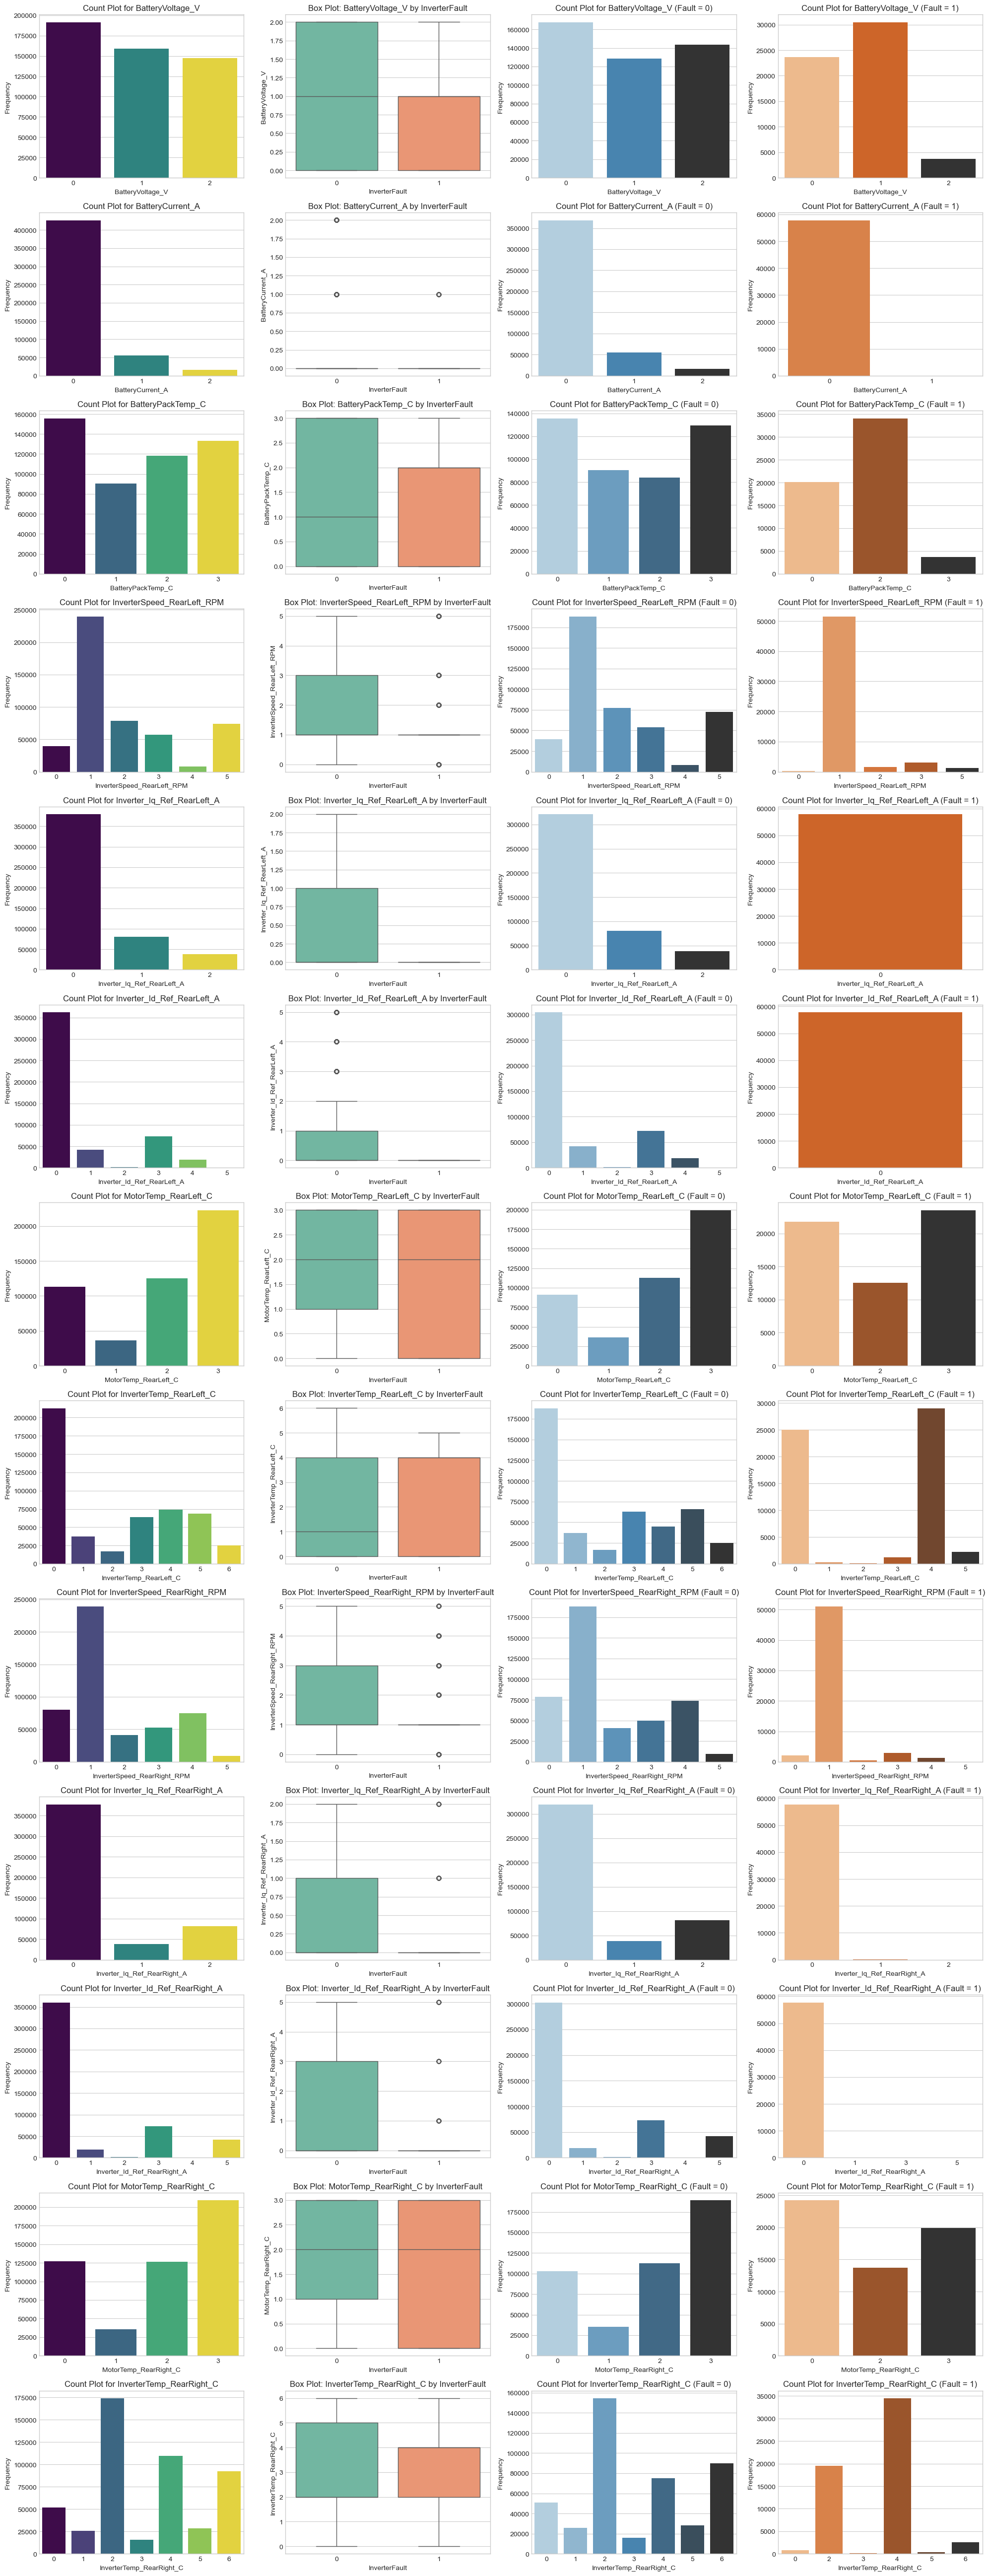

In [38]:
# Encode categorical columns using the specified encoding strategy
encoded_imola_20250113_df, _ = DataEncoder.encode_categorical_columns(
    df=kmeans_discretized_imola_20250113_df, 
    encoding_strategy='ordinal'
)

# Visualize the distribution of discrete variables with respect to 'InverterFault'
DataVisualizer.plot_discrete_distributions(
    df=encoded_imola_20250113_df,
    fault_col='InverterFault'
)

In [39]:
# Define output file path
output_file = os.path.join(DISCRETIZED_ORIGINAL_DATASETS_IMOLA_FOLDER_NAME, 'kmeans', 'discr-20250113-imola.csv')

# Save the discretized dataset
DataProcessor.save_dataset(kmeans_discretized_imola_20250113_df, output_file, file_format="csv")
print(f"✅ Saved discretized (KMeans) data to: {output_file}")

Dataset with shape (497553, 14), saved successfully at .\data\discretized-datasets-imola\kmeans\discr-20250113-imola.csv (csv).
✅ Saved discretized (KMeans) data to: .\data\discretized-datasets-imola\kmeans\discr-20250113-imola.csv


### 🔷 Discretizing `20250114-imola` dataset with `KMeans`

In [40]:
# Perform K-Means discretization
kmeans_discretized_imola_20250114_df, kmeans_result = DataDiscretizer.discretize_kmeans(
    df=imola_20250114_df.drop(columns=['InverterFault']), 
    n_bins=list(kmeans_bins.values())  # Extract bin values in correct order
)


# Display K-Means discretization results in a readable format
print("\n" + "="*80)
print("🔍 K-Means Discretization Summary")
print("="*80)

for col, details in kmeans_result.items():
    print(f"\n📌 Feature: {col}")
    print("-" * 60)
    print(f"  📊 Method: {details['method']}")
    print(f"  🔢 Number of Bins: {details['bin_count']}")
    print(f"  📍 Bin Edges: {details['bin_edges']}")
    print(f"  🎯 Cluster Centers: {details['cluster_centers']}")
    print(f"  📈 Value Counts: {details['value_counts']}")
    print(f"  🔄 Mapping: {details['mapping']}")
    print("-" * 60)

Processing column: BatteryVoltage_V
BatteryVoltage_V: Using provided n_bins: 3
BatteryVoltage_V discretized into 3 bins.
Processing column: BatteryCurrent_A
BatteryCurrent_A: Using provided n_bins: 3
BatteryCurrent_A discretized into 3 bins.
Processing column: BatteryPackTemp_C
BatteryPackTemp_C: Using provided n_bins: 4
BatteryPackTemp_C discretized into 4 bins.
Processing column: InverterSpeed_RearLeft_RPM
InverterSpeed_RearLeft_RPM: Using provided n_bins: 6
InverterSpeed_RearLeft_RPM discretized into 6 bins.
Processing column: Inverter_Iq_Ref_RearLeft_A
Inverter_Iq_Ref_RearLeft_A: Using provided n_bins: 3
Inverter_Iq_Ref_RearLeft_A discretized into 3 bins.
Processing column: Inverter_Id_Ref_RearLeft_A
Inverter_Id_Ref_RearLeft_A: Using provided n_bins: 6
Inverter_Id_Ref_RearLeft_A discretized into 6 bins.
Processing column: MotorTemp_RearLeft_C
MotorTemp_RearLeft_C: Using provided n_bins: 4
MotorTemp_RearLeft_C discretized into 4 bins.
Processing column: InverterTemp_RearLeft_C
Inver

In [43]:
# Perform discretization on numeric columns using predefined bin configurations
binarization_info, binarized_fault_df = DataDiscretizer.binarize_columns(
    df=imola_20250114_df['InverterFault'].to_frame(),
    columns=['InverterFault'],
    thresholds={'InverterFault': 0.5},
    labels={'InverterFault': [0, 1]}
)

# Add the binzarized column to discretized dataframe
kmeans_discretized_imola_20250114_df['InverterFault'] = binarized_fault_df['InverterFault']

# Display summary of binarization results
print("\n📊 Binarization Overview:")
for column, info in binarization_info.items():
    print(f"\n🔹 Column: {column}")
    print(f"   - Threshold: {info['threshold']}")
    print(f"   - True (%): {info['percentage_true']}")
    print("   - Value Counts:")
    print(info['value_counts'].to_string())


📊 Binarization Overview:

🔹 Column: InverterFault
   - Threshold: 0.5
   - True (%): 12.56931975538491
   - Value Counts:
InverterFault
0    527840
1     75884


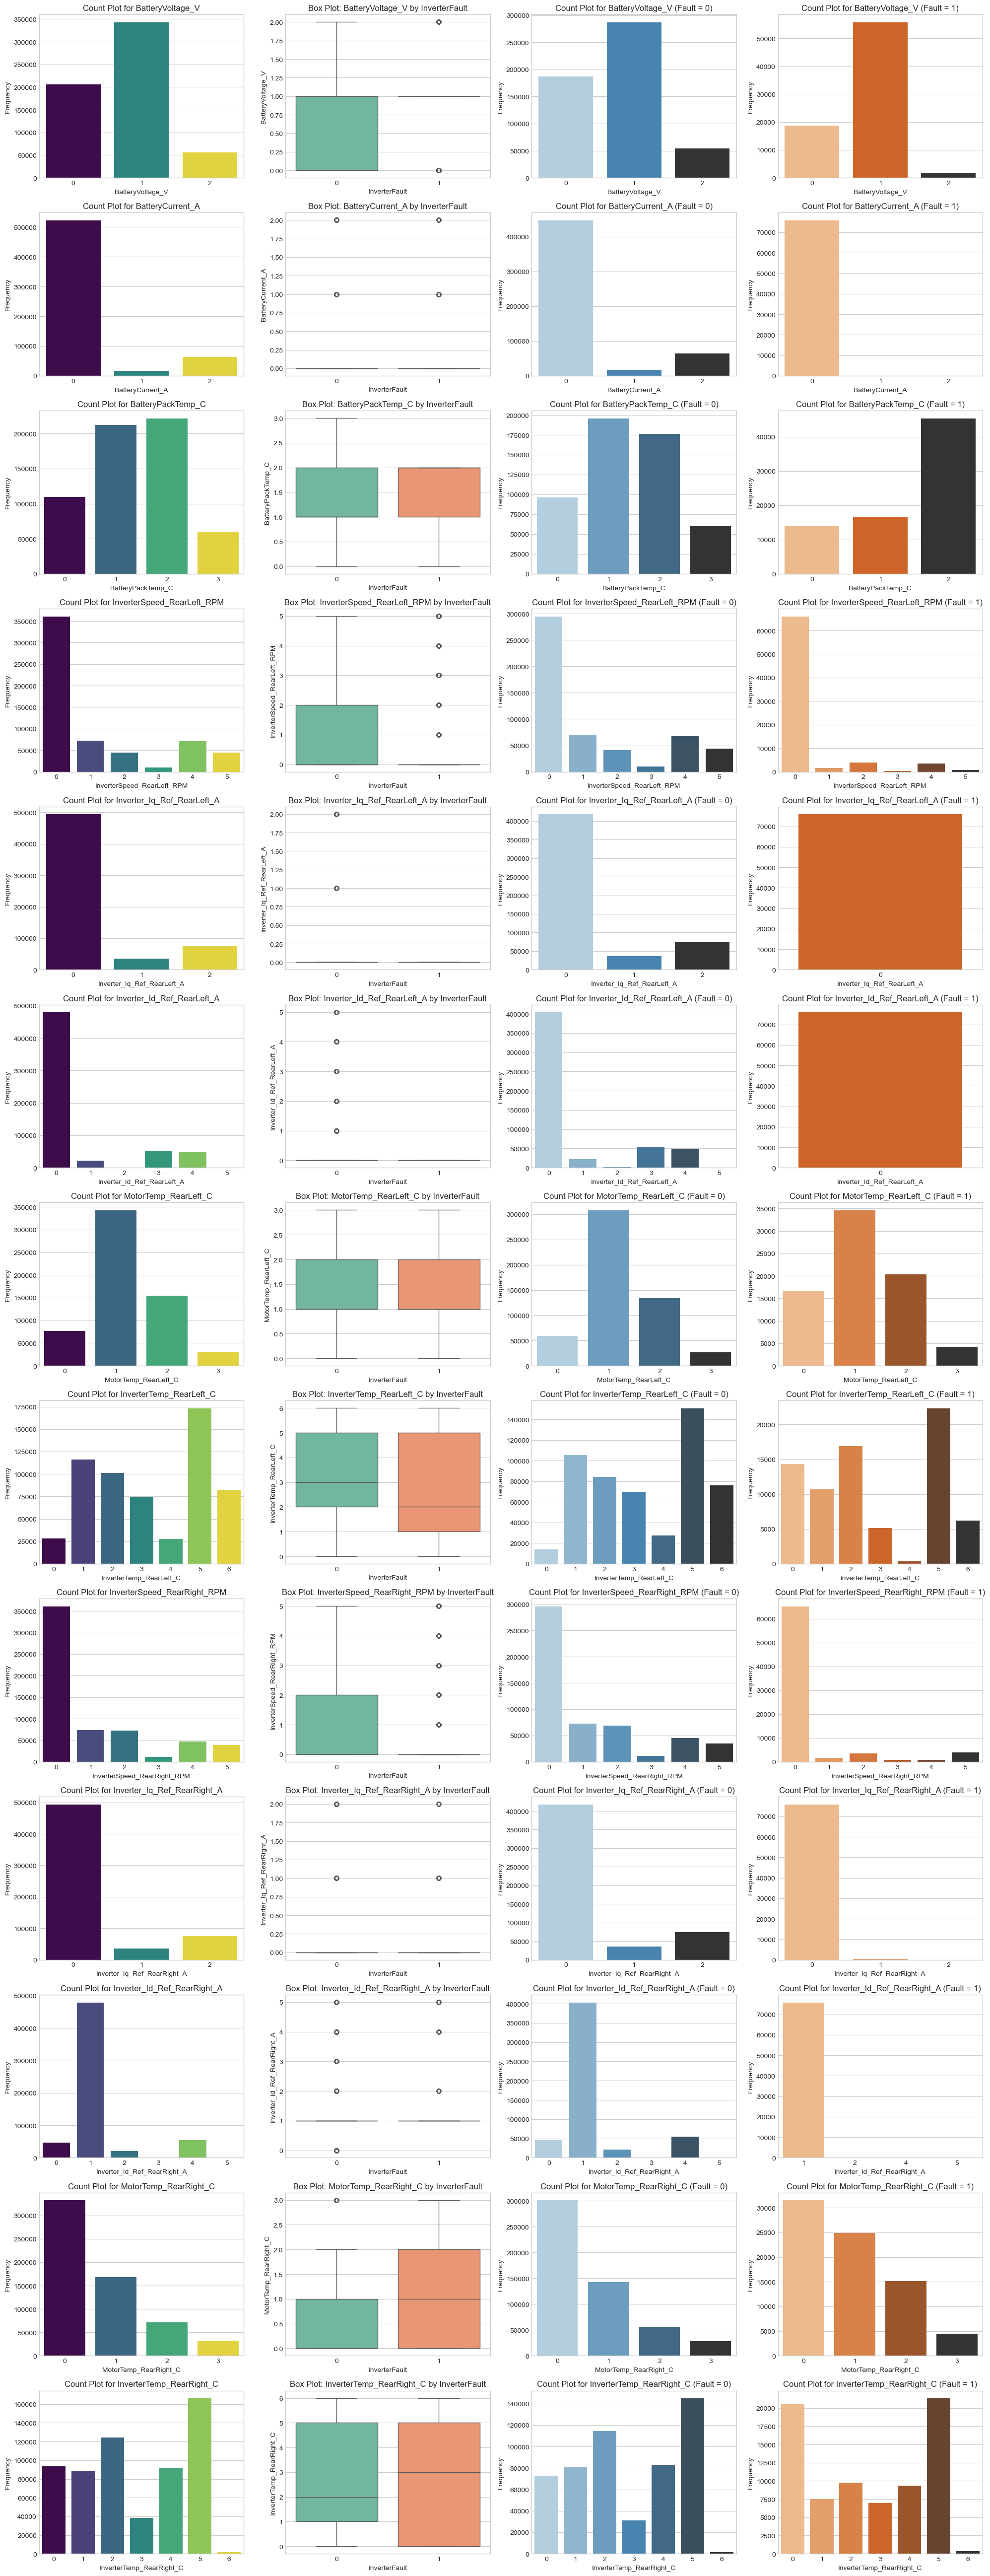

In [46]:
# Encode categorical columns using the specified encoding strategy
encoded_imola_20250114_df, _ = DataEncoder.encode_categorical_columns(
    df=kmeans_discretized_imola_20250114_df, 
    encoding_strategy='ordinal'
)

# Visualize the distribution of discrete variables with respect to 'InverterFault'
DataVisualizer.plot_discrete_distributions(
    df=encoded_imola_20250114_df,
    fault_col='InverterFault'
)

In [47]:
# Define output file path
output_file = os.path.join(DISCRETIZED_ORIGINAL_DATASETS_IMOLA_FOLDER_NAME, 'kmeans', 'discr-20250114-imola.csv')

# Save the discretized dataset
DataProcessor.save_dataset(kmeans_discretized_imola_20250114_df, output_file, file_format="csv")
print(f"✅ Saved discretized (KMeans) data to: {output_file}")

Dataset with shape (603724, 14), saved successfully at .\data\discretized-datasets-imola\kmeans\discr-20250114-imola.csv (csv).
✅ Saved discretized (KMeans) data to: .\data\discretized-datasets-imola\kmeans\discr-20250114-imola.csv
